# FIT5149 - Applied Data Analysis

# Assignment 1 - Predicting the Critical Temperature of a Superconductor

# Shiivong Kapil Birla - 30046572

# Table of Contents

* [Introduction](#sec_1)
* [EDA - Exploratory Data Analysis](#sec_2)
* [Statistical Tests](#sec_3)
* [Feature Selection](#sec_4)
* [Model Development](#sec_5)
* [Model Comparison](#sec_6)
* [Conclusion](#sec_7)
* [References](#sec_8)

# 1. Introduction <a class="anchor" id="sec_1"></a>

For this task at hand, the underlying problem is to **estimate the critical temperature given a new conductor’s properties**. There are eight properties that can be used: Atomic Mass, First Ionization Energy, Atomic Radius, Density, Electron Aﬃnity, Fusion Heat, Thermal Conductivity, Valence. 

For each property, ten features are extracted: Mean, Weighted mean, Geometric mean, Weighted geometric mean, Entropy, Weighted entropy, Range, Weighted range. Standard deviation, Weighted standard deviation.

We are required to build 2 to 3 models which can predict the critical temperature and compare the models based on **MSE (Measn Squared Error)**. The purpose of the description task is **identify the key properties** for a superconductor. In other words, which property contributes the most to your model’s performance?

We will begin by loading the necessary libraries into our environment.

In [1]:
library(ggplot2, warn.conflicts = FALSE)
library(caret, warn.conflicts = FALSE)
library(caTools, warn.conflicts = FALSE)
library(magrittr, warn.conflicts = FALSE)
library(dplyr, warn.conflicts = FALSE)
library(corrplot, warn.conflicts = FALSE)
library(ggthemes, warn.conflicts = FALSE)
library(gbm, warn.conflicts = FALSE)
library(rpart, warn.conflicts = FALSE)
library(xgboost, warn.conflicts = FALSE)
library(rpart.plot, warn.conflicts = FALSE)
library(rattle, warn.conflicts = FALSE)
library(DescTools, warn.conflicts = FALSE)
library(EMT, warn.conflicts = FALSE)
library(RColorBrewer, warn.conflicts = FALSE)
theme_set(theme_minimal())

Loading required package: lattice
corrplot 0.84 loaded
Loaded gbm 2.1.5
Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


Reading in the dataset `train.csv` and storing it in `data`.

In [2]:
data <- read.csv("train.csv")

Setting the seed so that our reserch is **reproducible**

In [3]:
set.seed(123)

Let's explore the data a bit and get the feel of all the variables, their datatypes and a few of their values as well. To do this, we can make use of the `str()` function.

In [4]:
str(data)

'data.frame':	21263 obs. of  82 variables:
 $ number_of_elements             : int  4 5 4 4 4 4 4 4 4 4 ...
 $ mean_atomic_mass               : num  88.9 92.7 88.9 88.9 88.9 ...
 $ wtd_mean_atomic_mass           : num  57.9 58.5 57.9 57.9 57.8 ...
 $ gmean_atomic_mass              : num  66.4 73.1 66.4 66.4 66.4 ...
 $ wtd_gmean_atomic_mass          : num  36.1 36.4 36.1 36.1 36.1 ...
 $ entropy_atomic_mass            : num  1.18 1.45 1.18 1.18 1.18 ...
 $ wtd_entropy_atomic_mass        : num  1.062 1.058 0.976 1.022 1.129 ...
 $ range_atomic_mass              : num  123 123 123 123 123 ...
 $ wtd_range_atomic_mass          : num  31.8 36.2 35.7 33.8 27.8 ...
 $ std_atomic_mass                : num  52 47.1 52 52 52 ...
 $ wtd_std_atomic_mass            : num  53.6 54 53.7 53.6 53.6 ...
 $ mean_fie                       : num  775 766 775 775 775 ...
 $ wtd_mean_fie                   : num  1010 1011 1011 1011 1010 ...
 $ gmean_fie                      : num  718 721 718 718 718 ...
 $

Interesting find! We have all the varibales as **numeric**, even the **response** variable **critical_temp** is numeric.

# Dimension / Summary of Data

For the preliminary analysis, let's find the **dimensions** of our full and training data.

In [5]:
dim(data)

print('The full data has 21263 rows with 82 columns')

[1] 21263    82

[1] "The full data has 21263 rows with 82 columns"


Now that we know the dimensions, let's summarize the data.

In [6]:
summary(data)

 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  

As a first, let's explore the data by viewing it using the `head()` function.

In [7]:
head(data)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23


Looking at the data, all the variables are **numeric**. There isn't even a single **categorical** variable in the entire dataset.

Let's start with plotting **Critical Temperature as a function of Number of Elements** in a *boxplot*.

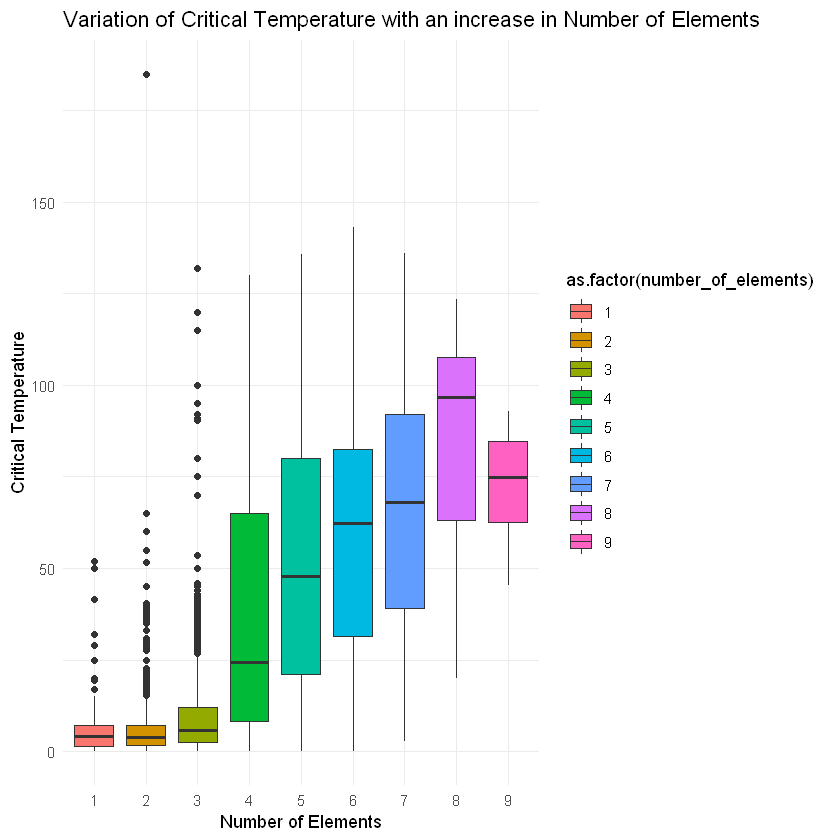

In [8]:
ggplot(aes(x = as.factor(number_of_elements), y = critical_temp, fill = as.factor(number_of_elements)), data = data) + 
geom_boxplot() + 
xlab('Number of Elements') + 
ylab('Critical Temperature') + 
ggtitle('Variation of Critical Temperature with an increase in Number of Elements')

We see here that the **Critical Temperature increases with an increase in Number of Elements**.

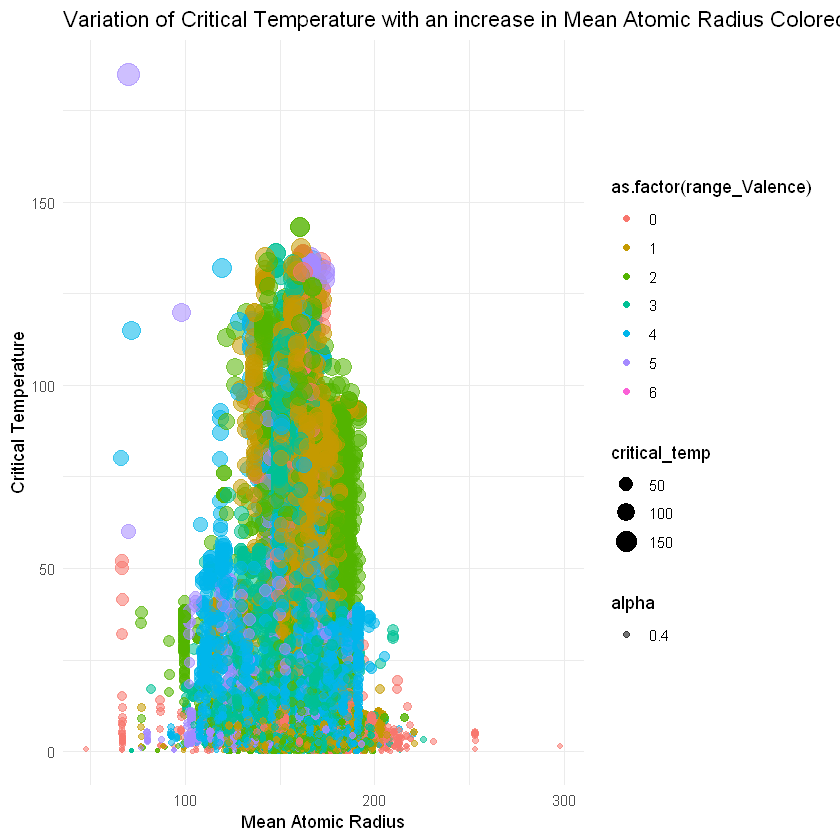

In [9]:
ggplot(aes(x = mean_atomic_radius, y = critical_temp, color = as.factor(range_Valence)), data = data) + 
geom_point(aes(size = critical_temp, alpha = 0.4)) + 
xlab('Mean Atomic Radius') + 
ylab('Critical Temperature') + 
ggtitle('Variation of Critical Temperature with an increase in Mean Atomic Radius Colored by Valence')

This plot suggests  that most if the elements that have a high critical temperature belong to **range valence 2**.

# Extreme Outlier Detection

Extreme outliers, just like **normal outliers**, are outliers in the data, but have a much higher level of **extreme** since here the **upper and lower limit** are **3 times the IQR(Inter Quartile Range)** instead of the usual **1.5 times the IQR(Inter Quartile Range)**.

We can write a **for loop** which will iterate through all the attributes in our data and calculate **1st and 3rd quartiles, which corressponds to the 25th and 75th percentile respectively**. 

We are only interested in finding out the **total number of columns** which has extreme outliers and also **which columns have extreme outliers**.

In [10]:
outliers_vec_0.25 <- c()
outliers_vec_0.75 <- c()
outliers_diff <- c()
outliers_column_count <- 0
upper_limit <- c()
lower_limit <- c()

for (columns in 1:ncol(data))
    
    {
      
        outliers_vec_0.25[columns] <- quantile(data[, columns])[2]
        outliers_vec_0.75[columns] <- quantile(data[, columns])[4]
    
        outliers_diff[columns] <- outliers_vec_0.75[columns] - outliers_vec_0.25[columns]
    
        upper_limit[columns] <- outliers_vec_0.75[columns] + (3 * outliers_diff[columns])
        lower_limit[columns] <- outliers_vec_0.25[columns] - (3 * outliers_diff[columns])
    
        if(max(data[, columns]) > upper_limit[columns] | min(data[, columns]) < lower_limit[columns])
            
            {
            
            outliers_column_count <- outliers_column_count + 1
            print('Extreme Outliers found in the column : ')
            print(columns) 
        }
        
    
    }

cat('\n\nThe total number of Extreme Outliers are : ', outliers_column_count)

[1] "Extreme Outliers found in the column : "
[1] 2
[1] "Extreme Outliers found in the column : "
[1] 3
[1] "Extreme Outliers found in the column : "
[1] 4
[1] "Extreme Outliers found in the column : "
[1] 5
[1] "Extreme Outliers found in the column : "
[1] 9
[1] "Extreme Outliers found in the column : "
[1] 12
[1] "Extreme Outliers found in the column : "
[1] 14
[1] "Extreme Outliers found in the column : "
[1] 17
[1] "Extreme Outliers found in the column : "
[1] 22
[1] "Extreme Outliers found in the column : "
[1] 23
[1] "Extreme Outliers found in the column : "
[1] 24
[1] "Extreme Outliers found in the column : "
[1] 29
[1] "Extreme Outliers found in the column : "
[1] 32
[1] "Extreme Outliers found in the column : "
[1] 33
[1] "Extreme Outliers found in the column : "
[1] 34
[1] "Extreme Outliers found in the column : "
[1] 38
[1] "Extreme Outliers found in the column : "
[1] 39
[1] "Extreme Outliers found in the column : "
[1] 40
[1] "Extreme Outliers found in the column : "
[1] 4

As it turns out, we have **extreme outliers in 42 of the 82 columns** in our dataset. That's a lot of columns, we will further investigate these outliers when make **boxplots** to explore them.

We can start investigating each attribute with the response variable **critical temperature** and see how it may or may not affect our response variable.

# 2. EDA - Exploratory Data Analysis <a class="anchor" id="sec_2"></a>

EDA or Exploratory Data Analysis is a technique where we try to **explore the data**, often using **Data Visualization** and **Statistical Analysis** approaches. It's about what we can infer from the data that we hand, and more importantly, **what the data is telling us**. 

Since we have 80 features in our dataset, we will explore them one by one starting with the Valence attribute.

#  Valence

**Valence** seems to be the only other variable which can be converted into a **categorical variable** other than **Number of Elements**, ofcourse.

So here we are again, with Critical Temperature as a function of Range of Valence.

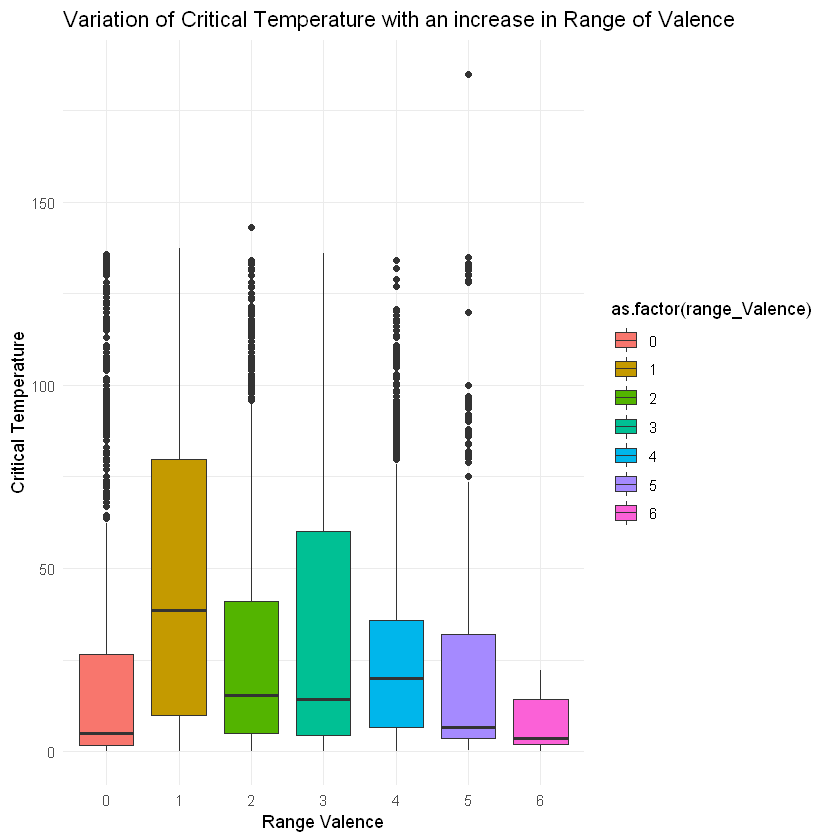

In [11]:
ggplot(aes(x = as.factor(range_Valence), y = critical_temp, fill = as.factor(range_Valence)), data = data) + 
geom_boxplot() + 
xlab('Range Valence') + 
ylab('Critical Temperature') + 
ggtitle('Variation of Critical Temperature with an increase in Range of Valence')

This seems pretty consistent but Critical Temperatures belonging to **Range Valence 0** are having way more outliers compared to others. Also, **Range Valence 1** has the highest **variation** of Critical Temperatures.

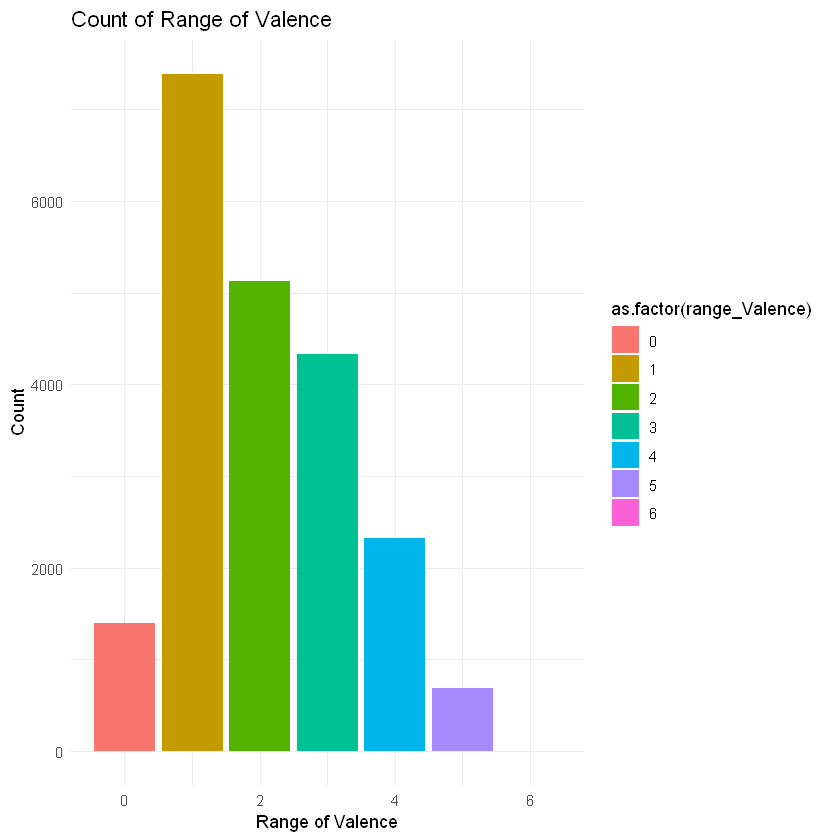

In [12]:
ggplot(aes(x = range_Valence, fill = as.factor(range_Valence)), data = data) + 
geom_bar() + 
ggtitle('Count of Range of Valence') + 
xlab('Range of Valence') + 
ylab('Count')

From the plot, it looks like some range of valence are represented more than others. Like **range valence 6** is non-exitent.

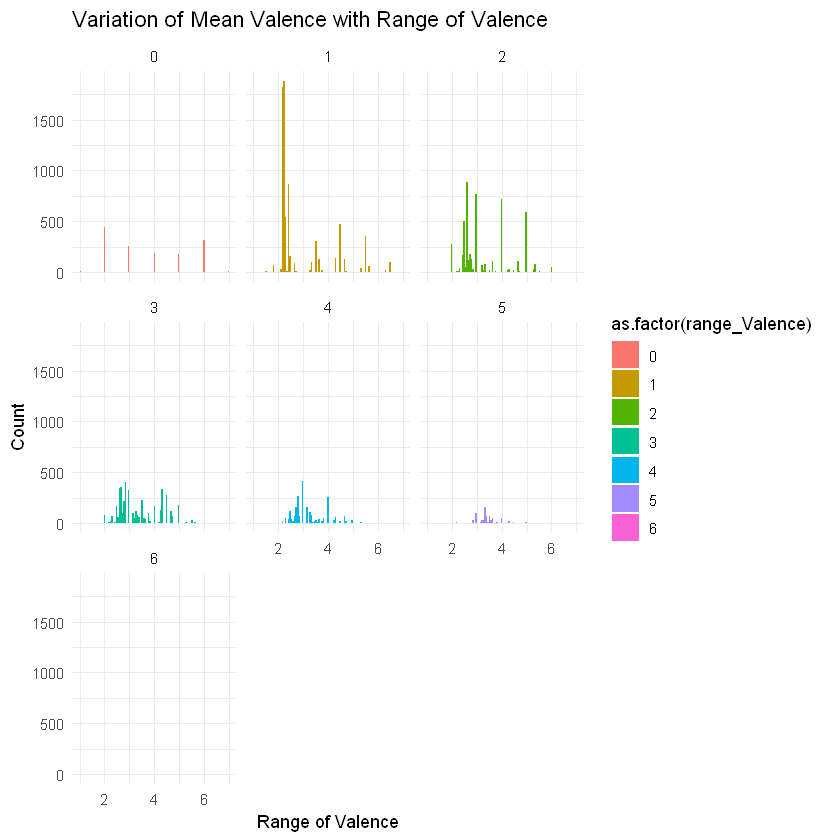

In [13]:
ggplot(aes(x = mean_Valence, fill = as.factor(range_Valence)), data = data) + 
geom_histogram(bins = 100) + 
ggtitle('Variation of Mean Valence with Range of Valence') + 
xlab('Range of Valence') + 
ylab('Count') + 
facet_wrap(~as.factor(range_Valence))

Mean Valence is pretty  **consistent throughout different Valences**, but again, it is non-existent for Range Valence 6.

There also seems to be **unusual spikes** for Range Valence 1. Could this mean something or is this a coincidence?

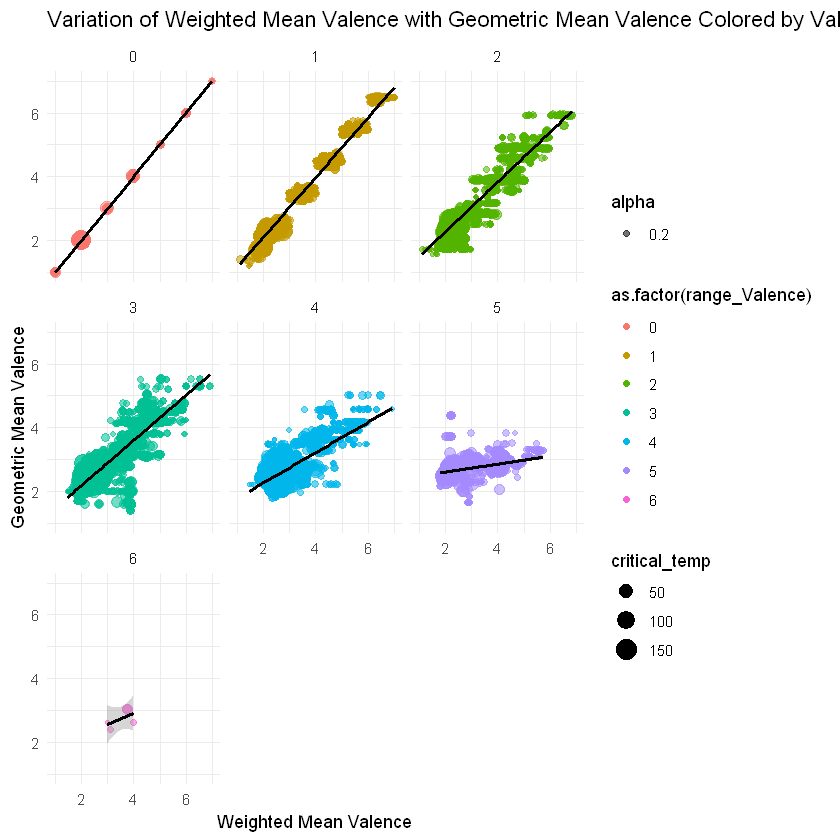

In [14]:
ggplot(aes(x = wtd_mean_Valence, y = gmean_Valence, color = as.factor(range_Valence)), data = data) + 
geom_point(aes(size = critical_temp, alpha = 0.2)) + 
xlab('Weighted Mean Valence') + 
ylab('Geometric Mean Valence') + 
ggtitle('Variation of Weighted Mean Valence with Geometric Mean Valence Colored by Valence') + 
facet_wrap(~as.factor(range_Valence)) + 
geom_smooth(method = "lm", color = "black")

There is a rather weird distribution of Weighted MEan Valence with Geometric Mean Valence as some of them are **continuous** and some seem to be **discrete**. All of them have a **positive slope** as well, suggesting a **linar postitive** relationship between the two.

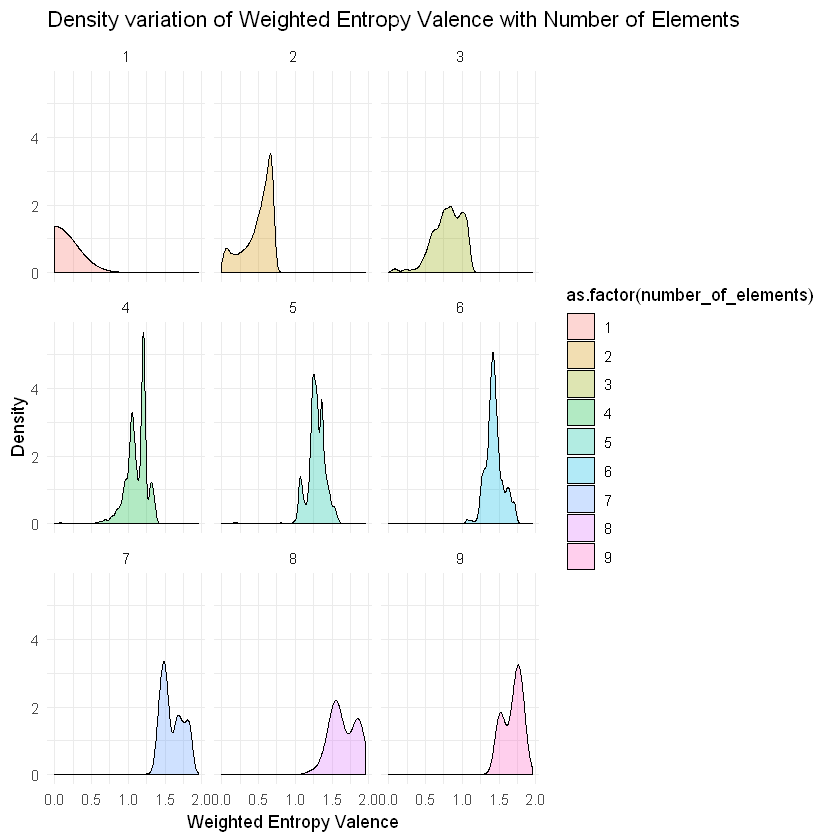

In [15]:
ggplot(aes(x = wtd_entropy_Valence, fill = as.factor(number_of_elements)), data = data) + 
geom_density(alpha = 0.3) + 
xlab('Weighted Entropy Valence') + 
ylab('Density') + 
ggtitle('Density variation of Weighted Entropy Valence with Number of Elements') + 
facet_wrap(~as.factor(number_of_elements)) 

Interesting find! There is a **significant spike** where number of elements are **4, 5 and 6** and relatively flat for others. Could this be an important variable for our model? 

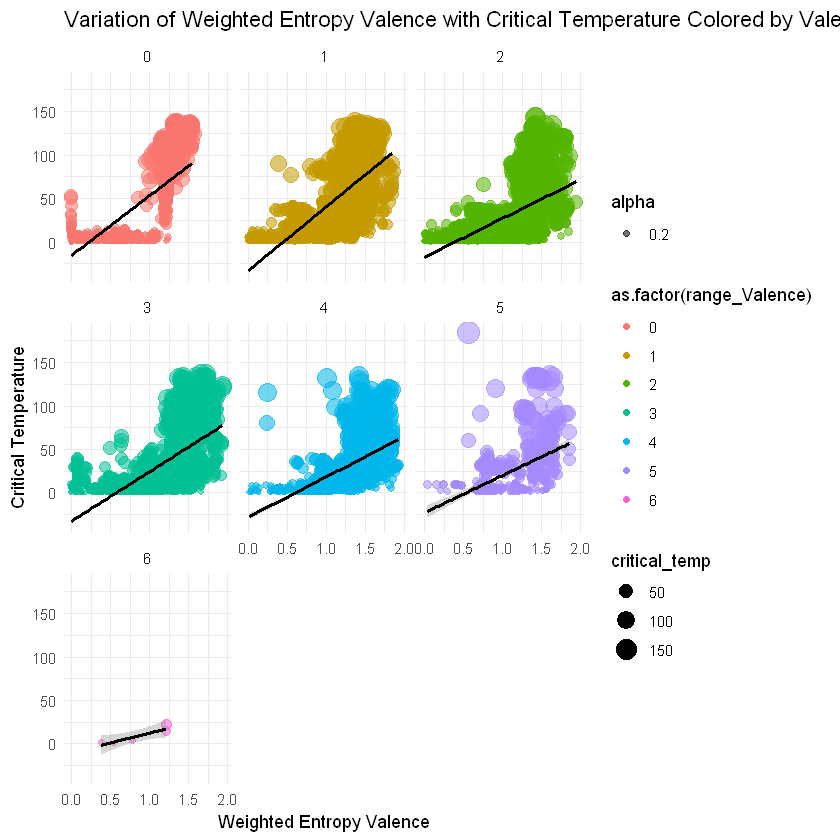

In [16]:
ggplot(aes(x = wtd_entropy_Valence, y = critical_temp, color = as.factor(range_Valence)), data = data) + 
geom_point(aes(size = critical_temp, alpha = 0.2)) + 
xlab('Weighted Entropy Valence') + 
ylab('Critical Temperature') + 
ggtitle('Variation of Weighted Entropy Valence with Critical Temperature Colored by Valence') + 
facet_wrap(~as.factor(range_Valence)) + 
geom_smooth(method = "lm", color = "black")

Wow! What's going on here? Seems like these two variables have a **story to tell**! There's a serious relationship here, a **positive relationship** as seen from the **slope of the line**. This is definitely an important feature for our model.

Now let us look at the correlation plot for the entirety of **Valence properties** to confirm our findings.

In [17]:
data_valence <- data[, c('mean_Valence', 'wtd_mean_Valence', 'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence', 'range_Valence', 'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence', 'critical_temp')]

Now that we have all the Valence properties and critical temperature in a single dataframe, let's find out their correlation.

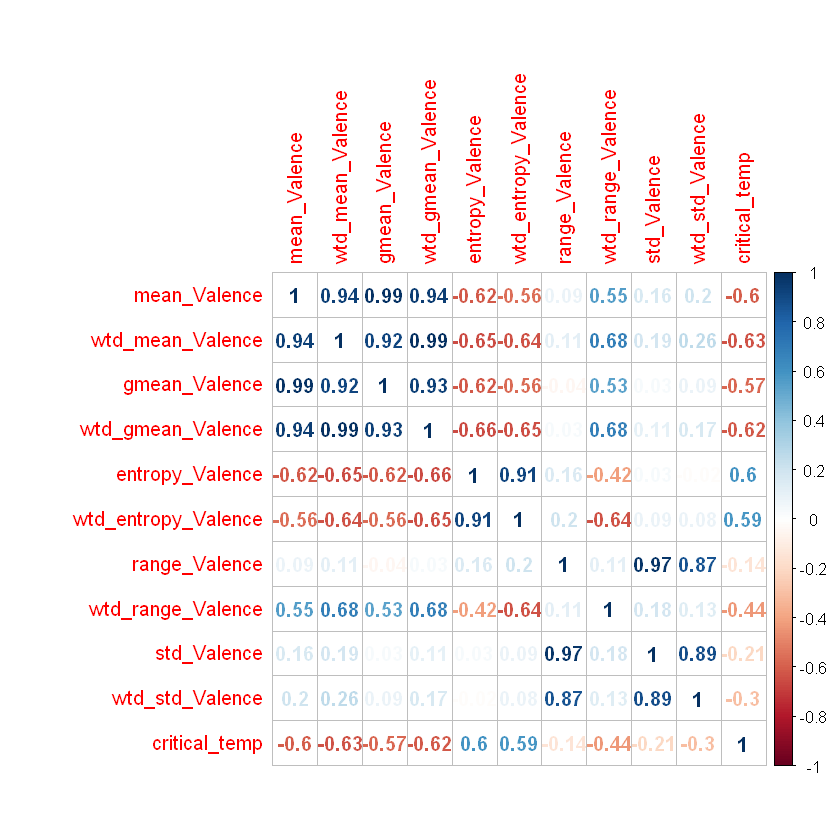

In [18]:
corr_plot_valence <- cor(data_valence)
corrplot(corr_plot_valence, method = "number")

We were right! **weighted_entropy_Valence** is one of the most **strongly correlated features** with the **critical temperature**! We may later be able to confirm this using a classifier and subsequently a **feature importance** matrix.

**Possible Interaction between variables :**

1) range_Valence and std_Valence.

2) std_Valence and wtd_std_Valence.

3) wtd_gmean_Valence and wtd_mean_Valence.

Next up, **Density**.

# Density

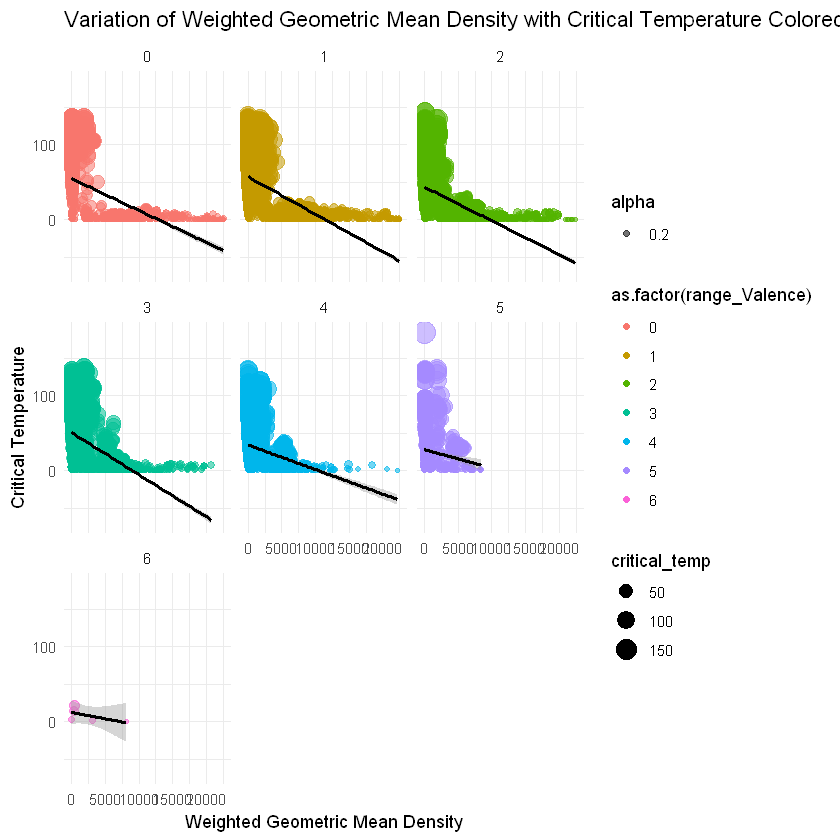

In [19]:
ggplot(aes(x = wtd_gmean_Density, y = critical_temp, color = as.factor(range_Valence)), data = data) + 
geom_point(aes(size = critical_temp, alpha = 0.2)) + 
xlab('Weighted Geometric Mean Density') + 
ylab('Critical Temperature') + 
ggtitle('Variation of Weighted Geometric Mean Density with Critical Temperature Colored by Valence') + 
facet_wrap(~as.factor(range_Valence)) + 
geom_smooth(method = "lm", color = "black")

Strong negative relationship with critical temperature! For all the number of elements this is consistent, these two are definitely highly correlated and maybe an important part in the model building. We shall keep a close eye on this one.

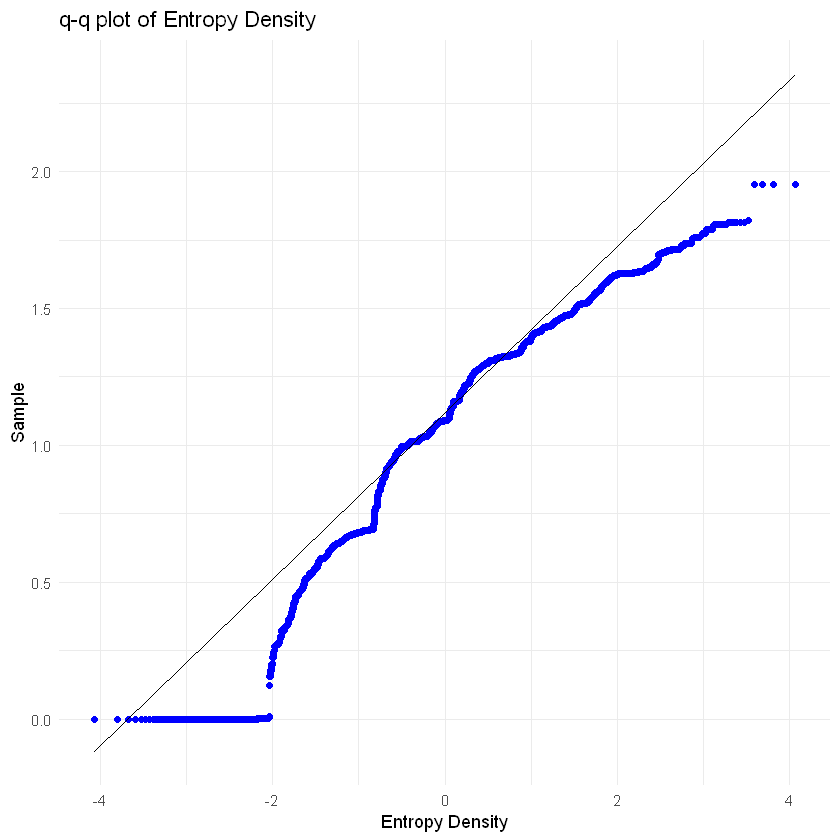

In [20]:
ggplot(aes(sample = entropy_Density), data = data) + geom_qq(color = 'blue') + 
geom_qq_line() + 
xlab('Entropy Density') + 
ylab('Sample') + 
ggtitle('q-q plot of Entropy Density') 

This can't be a good predictor as it's **hardly normally distributed**. Let's confirm this with the correlation plot.

In [21]:
data_density <- data[, c('mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'critical_temp')]

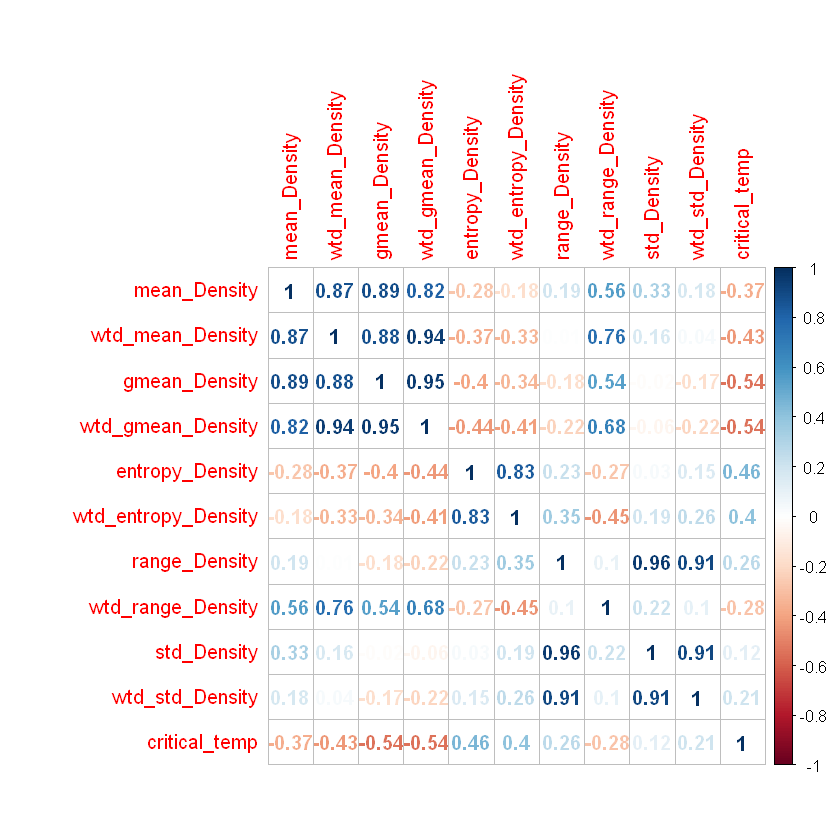

In [22]:
corr_plot_density <- cor(data_density)
corrplot(corr_plot_density, method = "number")

Clearly, there's nothing to see here. By the looks of it, the **Density** feature itself is **not a strong predictor for critical temperature**.

**Possible Interaction between variables :**

1) range_Density and std_Density.

2) range_Density and wtd_std_Density.

Next up, **Atomic Mass**.

# Atomic Mass

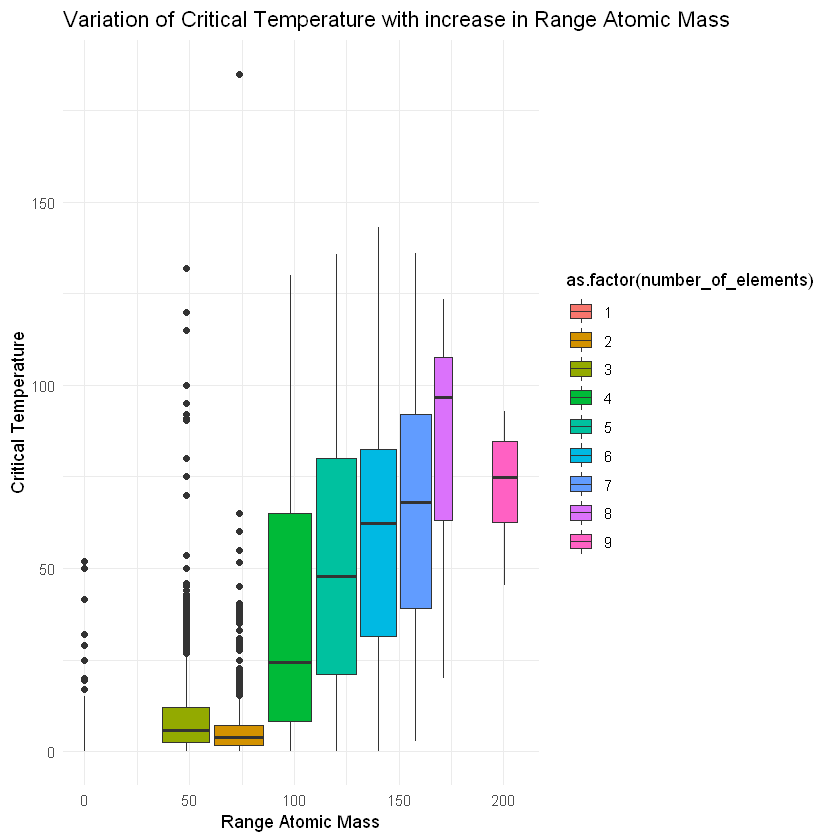

In [23]:
ggplot(aes(x = range_atomic_mass, y = critical_temp, fill = as.factor(number_of_elements)), data = data) + 
geom_boxplot() + 
xlab('Range Atomic Mass') + 
ylab('Critical Temperature') + 
ggtitle('Variation of Critical Temperature with increase in Range Atomic Mass')

Nothing much to see here, but notice how there are outliers only in the number of elements **1, 2 and 3**. Also notice that the the data points for number of elements is so low, that the boxplot isn't even visible.

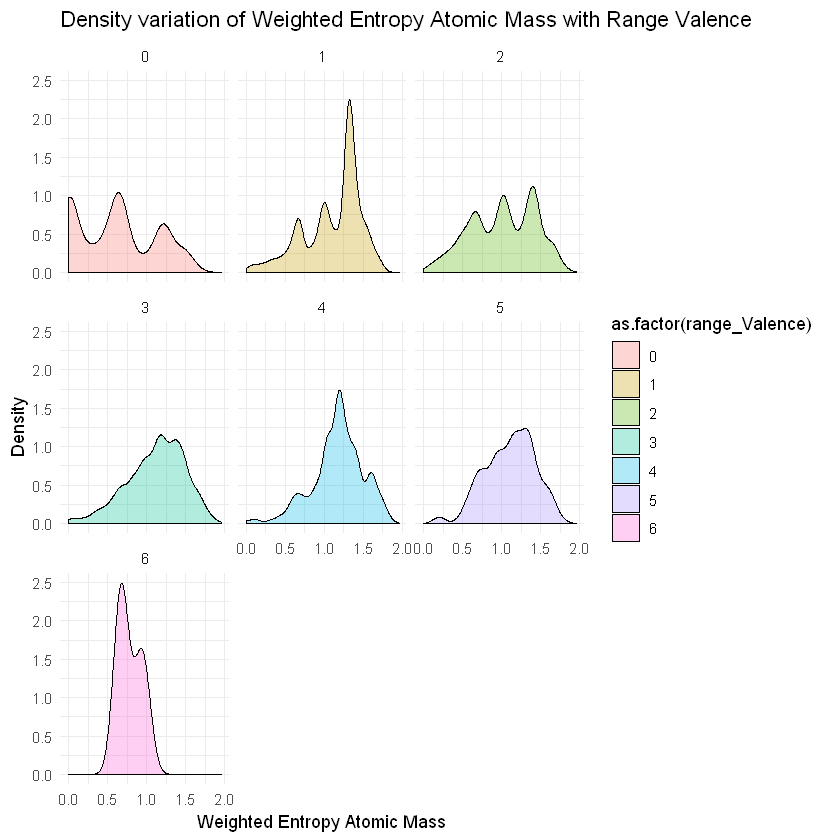

In [24]:
ggplot(aes(x = wtd_entropy_atomic_mass, fill = as.factor(range_Valence)), data = data) + 
geom_density(alpha = 0.3) + 
xlab('Weighted Entropy Atomic Mass') + 
ylab('Density') + 
ggtitle('Density variation of Weighted Entropy Atomic Mass with Range Valence') + 
facet_wrap(~as.factor(range_Valence)) 

Note how some of the distribution are tending to be **normal** whereas others are completely haphazard. This feature might be **moderately correlated to critical temperature** but **may not make it to the final list of features** for our model. 

Let's see the correlation plot to see if we've missed something.

In [25]:
data_atomic_mass <- data[, c('mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'critical_temp')]

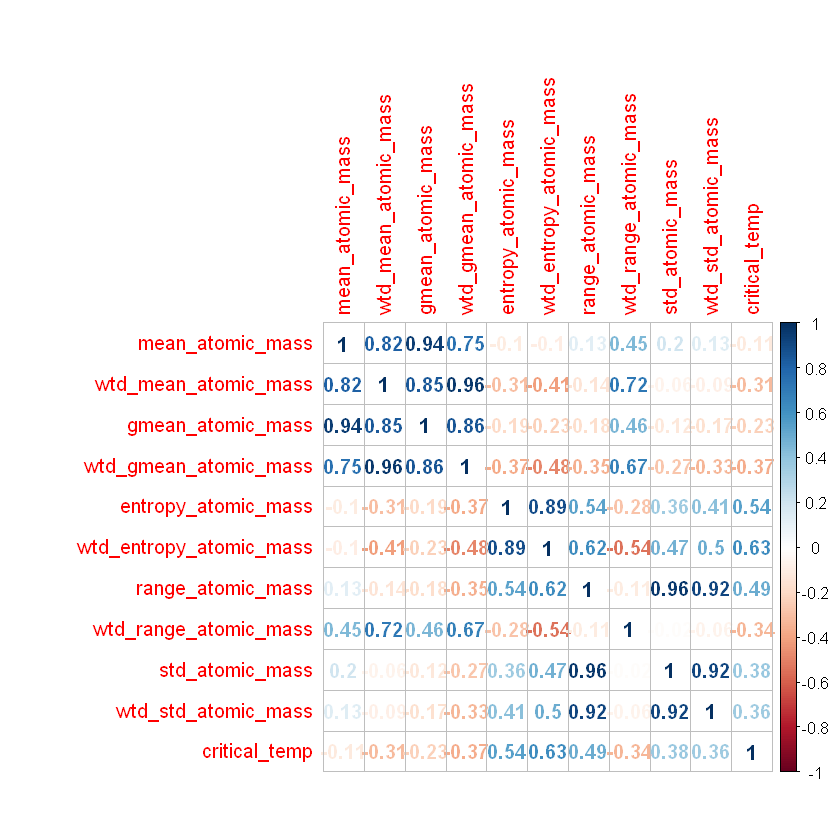

In [26]:
corr_plot_atomic_mass <- cor(data_atomic_mass)
corrplot(corr_plot_atomic_mass, method = "number")

**Weighted Entropy Atomic Mass** seems to be having quiete an impact on critical temperature, but there is **nothing significant** that we are able to deduce from the visualizations.

**Possible Interaction between variables :**

1) range_atomic_mass and std_atomic_mass.

2) wtd_mean_atomic_mass and wtd_gmean_atomic mass.

This was a closer look at Atomic Mass, next up is **Atomic Radius**.

# Atomic Radius

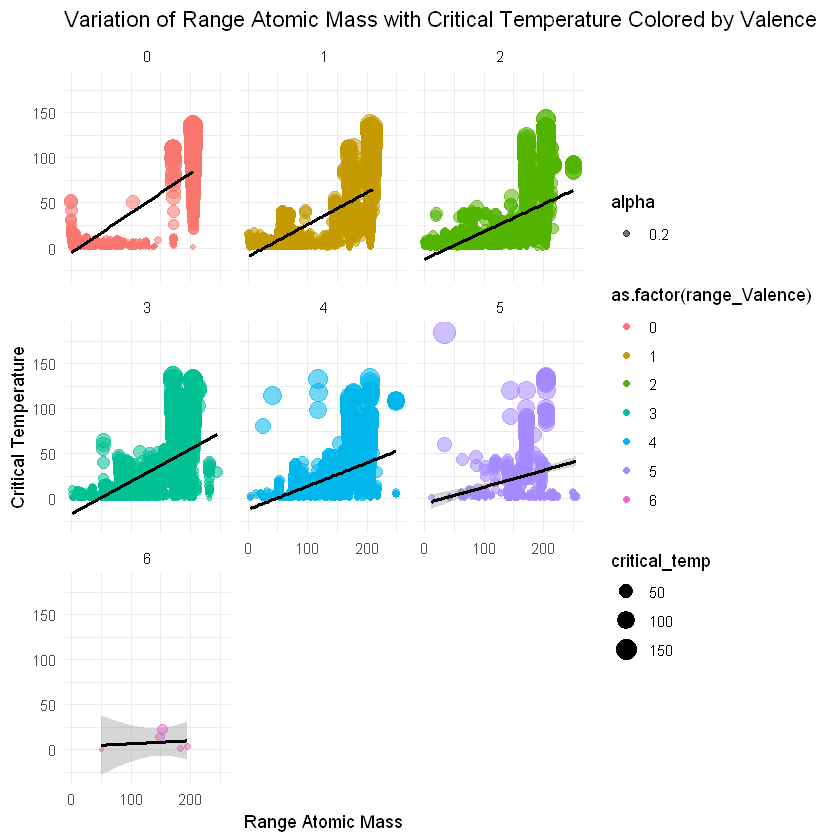

In [27]:
ggplot(aes(x = range_atomic_radius, y = critical_temp, color = as.factor(range_Valence)), data = data) + 
geom_point(aes(size = critical_temp, alpha = 0.2)) + 
xlab('Range Atomic Mass') + ylab('Critical Temperature') + 
ggtitle('Variation of Range Atomic Mass with Critical Temperature Colored by Valence') + 
facet_wrap(~as.factor(range_Valence)) + 
geom_smooth(method = "lm", color = "black")

The slope is **positive** in all the facets and the correlation seems **pretty good** if you ask me. Let's look at **Range Atmoic Radius's** distribution plot to see what's going on here. 

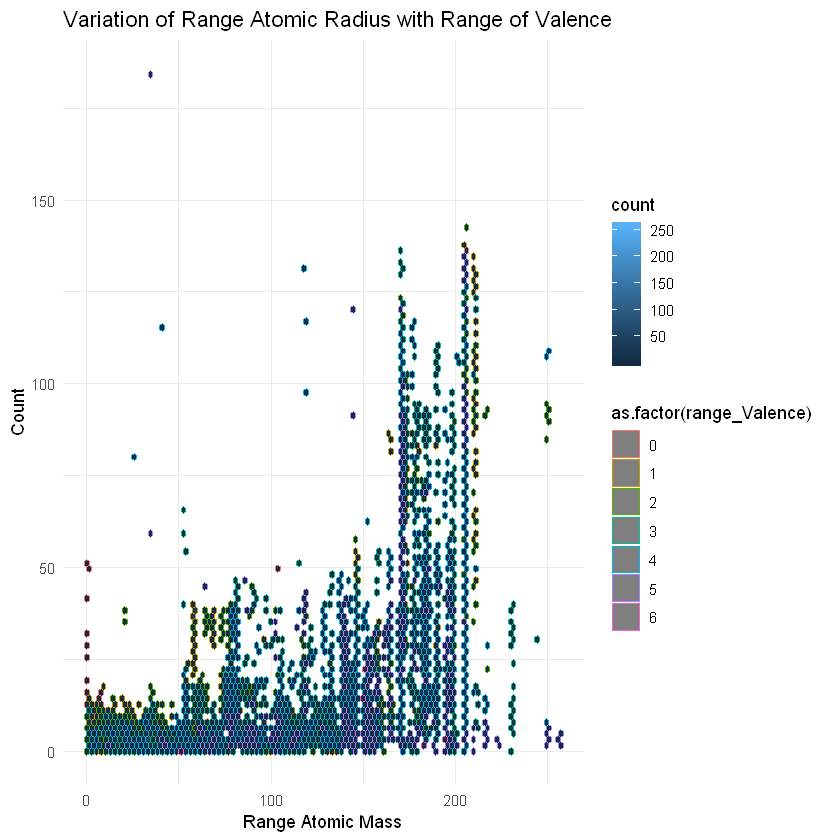

In [28]:
ggplot(aes(x = range_atomic_radius, y = critical_temp, color = as.factor(range_Valence)), data = data) + 
geom_hex(bins = 100) + 
ggtitle('Variation of Range Atomic Radius with Range of Valence') + 
xlab('Range Atomic Mass') + ylab('Count') 

Notice how the critical temperature **increases** exponentialy when the Range Atomic Mass hits around 180.

In [29]:
data_atomic_radius <- data[, c('mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'critical_temp')]

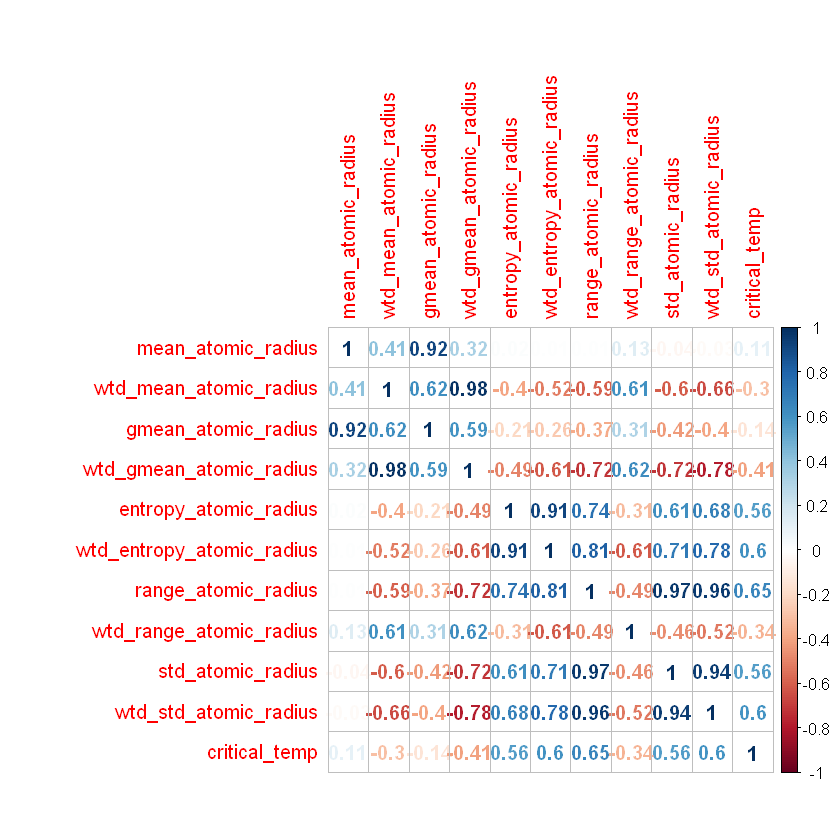

In [30]:
corr_plot_atomic_radius <- cor(data_atomic_radius)
corrplot(corr_plot_atomic_radius, method = "number")

Mama Mia! Just have a look at **Range Atomic Radius**, confirming what we already know for sometime now. Definitely a very strong positive correlation with critical temperature. One more variable for our model.

**Possible Interaction between variables :**

1) wtd_std_atomic_radius and std_atomic_radius.

2) range_atomic_radius and wtd_std_atomic_radius.

# Thermal Conductivity

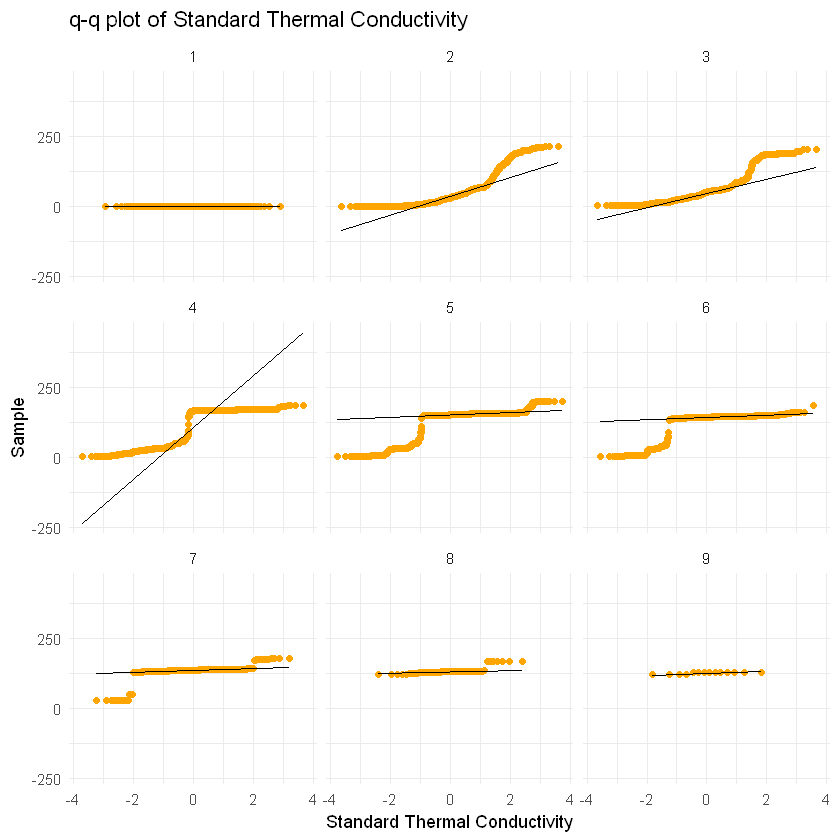

In [31]:
ggplot(aes(sample = std_ThermalConductivity), data = data) + 
geom_qq(color = 'orange') + 
geom_qq_line() + 
xlab('Standard Thermal Conductivity') + 
ylab('Sample') + 
ggtitle('q-q plot of Standard Thermal Conductivity') + 
facet_wrap(~as.factor(number_of_elements))

Most of them are normally distributed! That's a good sign for an important **predictor**. Let's explore **Weighted Standard Thermal Conductivity**.

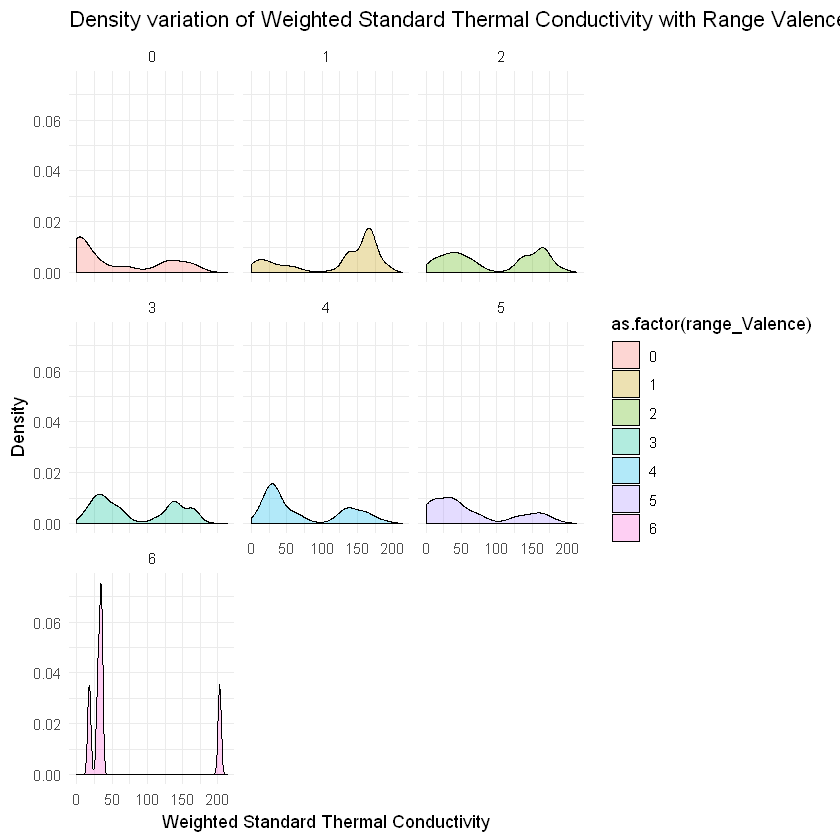

In [32]:
ggplot(aes(x = wtd_std_ThermalConductivity, fill = as.factor(range_Valence)), data = data) + 
geom_density(alpha = 0.3) + 
xlab('Weighted Standard Thermal Conductivity') + 
ylab('Density') + 
ggtitle('Density variation of Weighted Standard Thermal Conductivity with Range Valence') + 
facet_wrap(~as.factor(range_Valence)) 

What's going on there in the **Range Valence 6**? The density of all the others are strikingly **similar**! Standard Thermal Conductivity must also follow the same distribution.

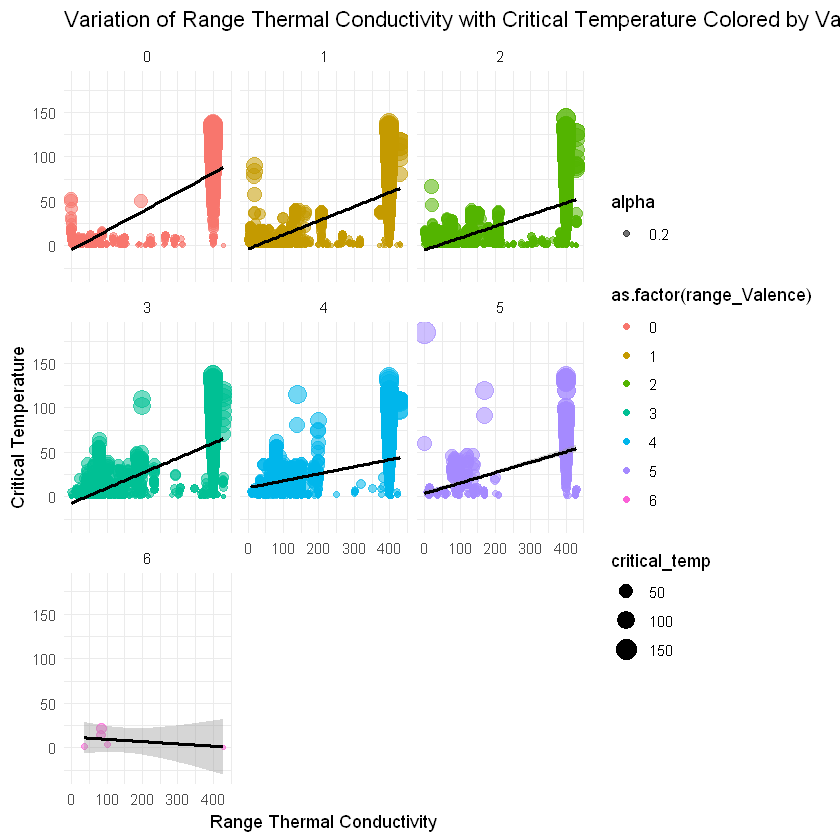

In [33]:
ggplot(aes(x = range_ThermalConductivity, y = critical_temp, color = as.factor(range_Valence)), data = data) + 
geom_point(aes(size = critical_temp, alpha = 0.2)) + 
xlab('Range Thermal Conductivity') + 
ylab('Critical Temperature') + 
ggtitle('Variation of Range Thermal Conductivity with Critical Temperature Colored by Valence') + 
facet_wrap(~as.factor(range_Valence)) + geom_smooth(method = "lm", color = "black")

Great variation there with Critical Temperature, **Range Thermal Conductivity** has! Positive slope and hence a positive correlation too. By the looks of it, it seems that this could be the best predictor that we have had to predict critical temperature so far.

Notice how the data points go **missing** in the middle somewhere? Could there be an explanation for this phenomenon? Also, there are some **outliers** as well. Onwards we go for the correlation plot!

In [34]:
data_thermal_conductivity <- data[, c('mean_ThermalConductivity', 'wtd_mean_ThermalConductivity', 'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity', 'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity', 'range_ThermalConductivity', 'wtd_range_ThermalConductivity', 'std_ThermalConductivity', 'wtd_std_ThermalConductivity', 'critical_temp')]

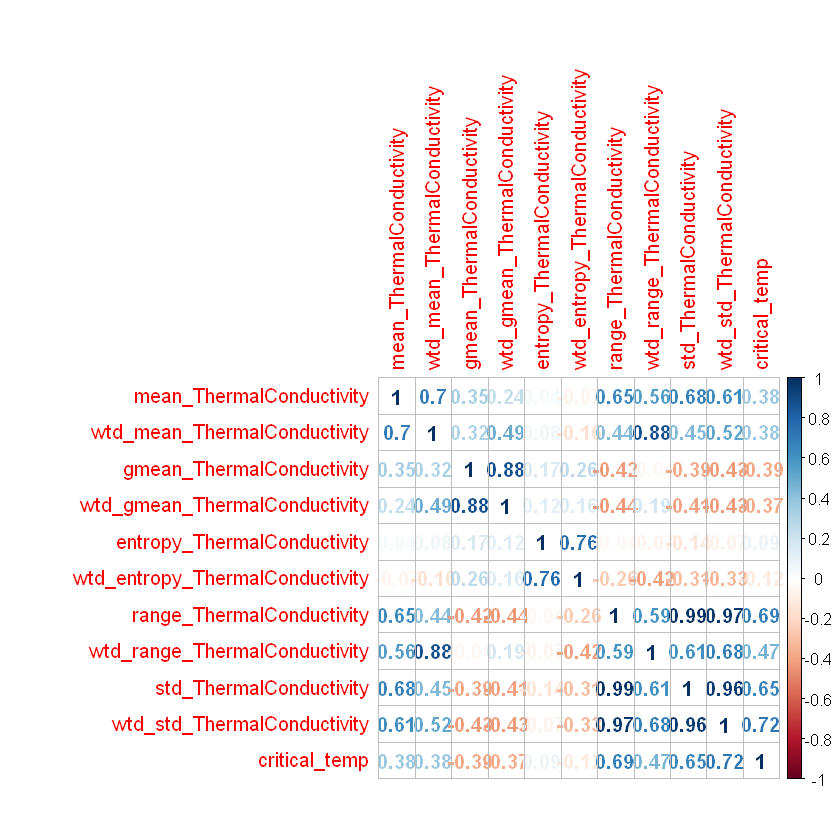

In [35]:
corr_plot_thermal_conductivity <- cor(data_thermal_conductivity)
corrplot(corr_plot_thermal_conductivity, method = "number")

Look at that! **Weighted Standard Thermal Conductivity**, **Range Thermal Conductivity** and **Standard Thermal Conductivity** are all **extremely positively and fairly highly** correlated to our response variable, critical temperature.

We should be thinking by now that atleast two of these variables should be able to make it's way into our final model.

**Possible Interaction between variables :**

1) range_ThermalConductivity and std_ThermalConductivity.

2) wtd_std_ThermalConductivity and range_ThermalConductivity.

# Fie

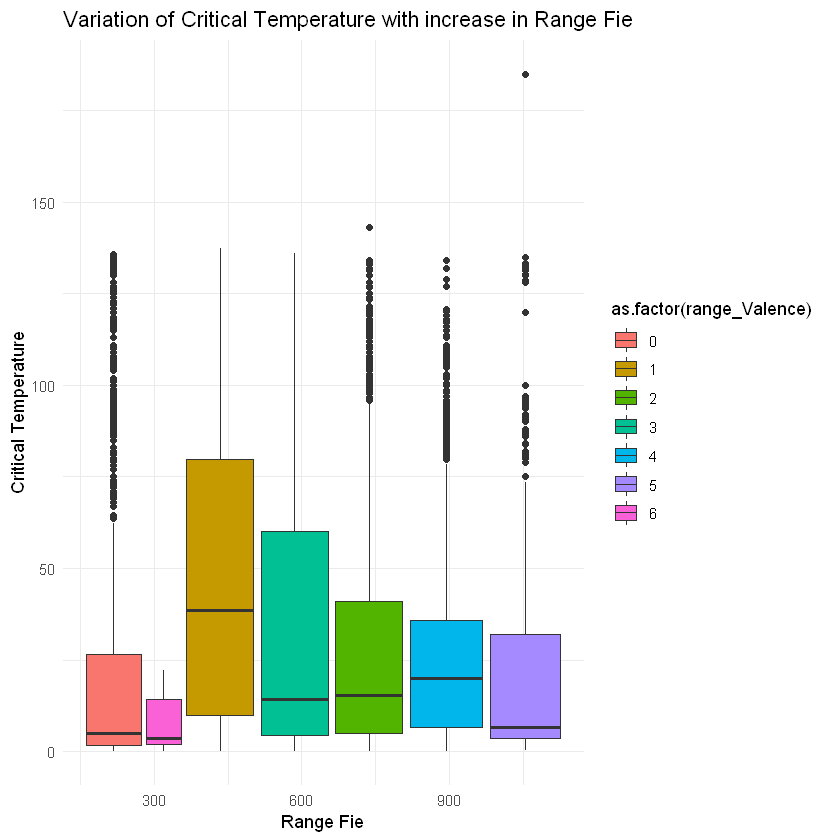

In [36]:
ggplot(aes(x = range_fie, y = critical_temp, fill = as.factor(range_Valence)), data = data) + 
geom_boxplot() + 
xlab('Range Fie') + 
ylab('Critical Temperature') + 
ggtitle('Variation of Critical Temperature with increase in Range Fie')

Nothing much can be said about this plot, just that there are a lot of outliers and that the critical temperature is **pretty high** for **Range Valence 1**.

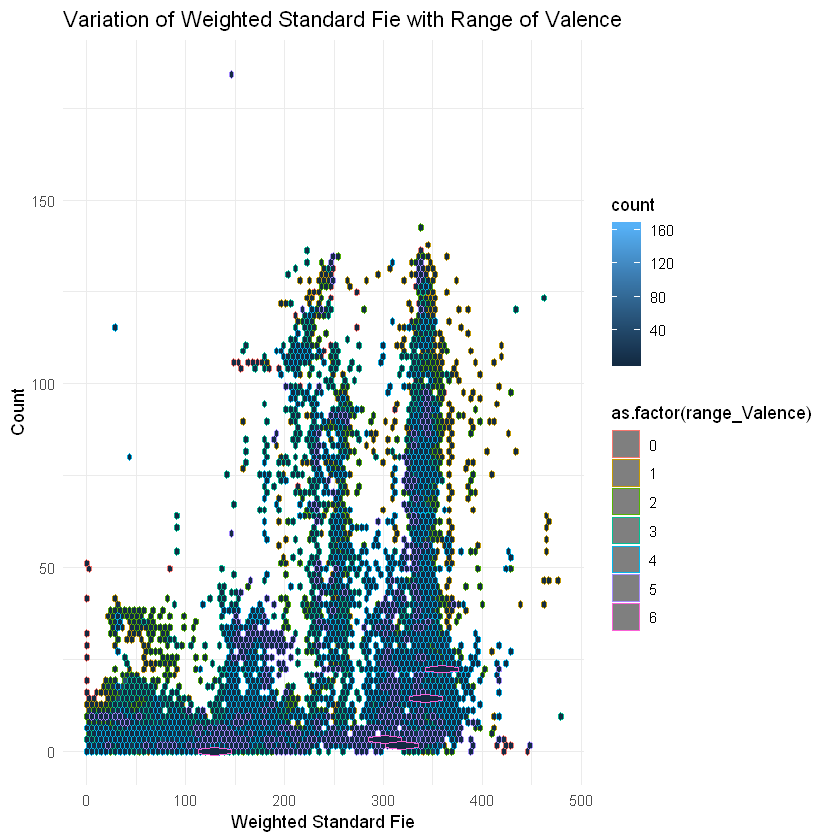

In [37]:
ggplot(aes(x = wtd_std_fie, y = critical_temp, color = as.factor(range_Valence)), data = data) + 
geom_hex(bins = 100) + 
ggtitle('Variation of Weighted Standard Fie with Range of Valence') + 
xlab('Weighted Standard Fie') + 
ylab('Count') 

It's difficult to imagine **Range Valence 6** having such prominence in this graph, given that for other variables it was almost **non-existent**. The critical Temperature also shoots up drastically around the 180 mark, what could that be about?

Correplation plot follows, as usual.

In [38]:
data_fie <- data[, c('mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'critical_temp')]

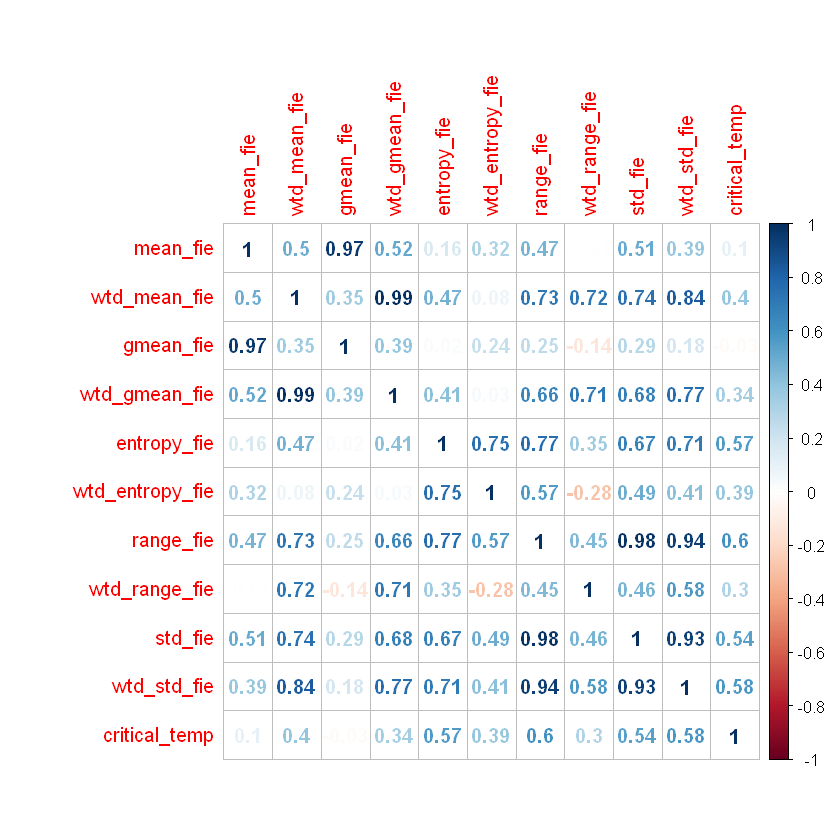

In [39]:
corr_plot_fie <- cor(data_fie)
corrplot(corr_plot_fie, method = "number")

Decent correlation with Critical Temperature, **Range Fie and Entropy Fie** have. 

**Possible Interaction between variables :**

1) std_fie and range_fie.

2) range_fie and wtd_std_fie.

# Electron Affinity

Warning message:
"position_stack requires non-overlapping x intervals"

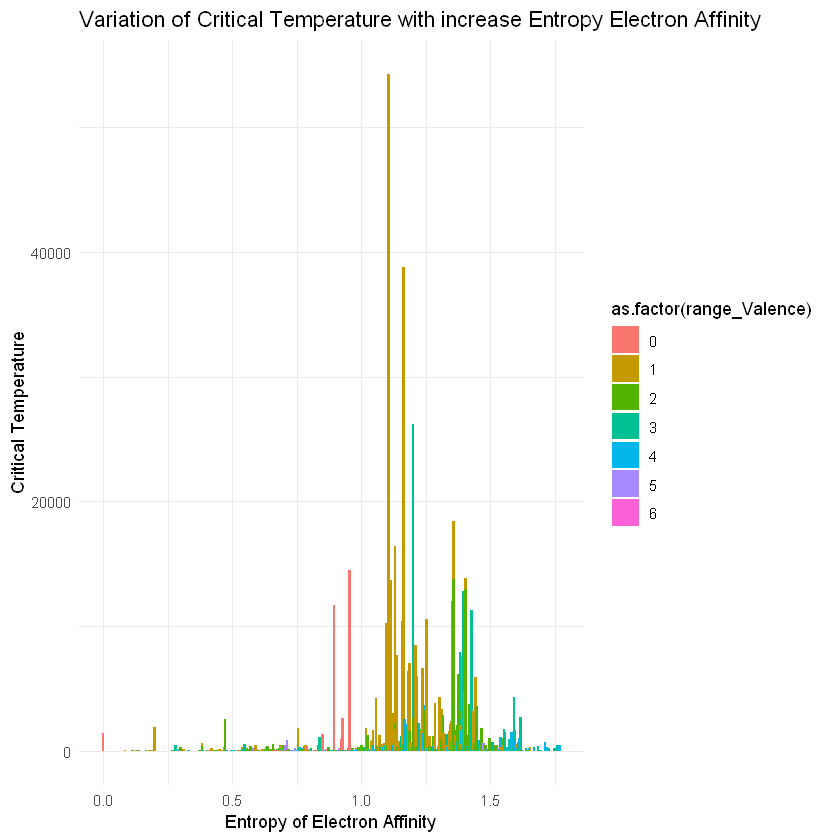

In [40]:
ggplot(aes(x = entropy_ElectronAffinity, y = critical_temp), data = data) + 
geom_col(aes(fill = as.factor(range_Valence)), width = 0.01) + 
xlab('Entropy of Electron Affinity') + 
ylab('Critical Temperature') + 
ggtitle('Variation of Critical Temperature with increase Entropy Electron Affinity') 

This is a **right skewed** distribution, with most of the values coming to the right side of the distribution. It also shows **unusual peaks** for **Range Valence 1 and 3**.  

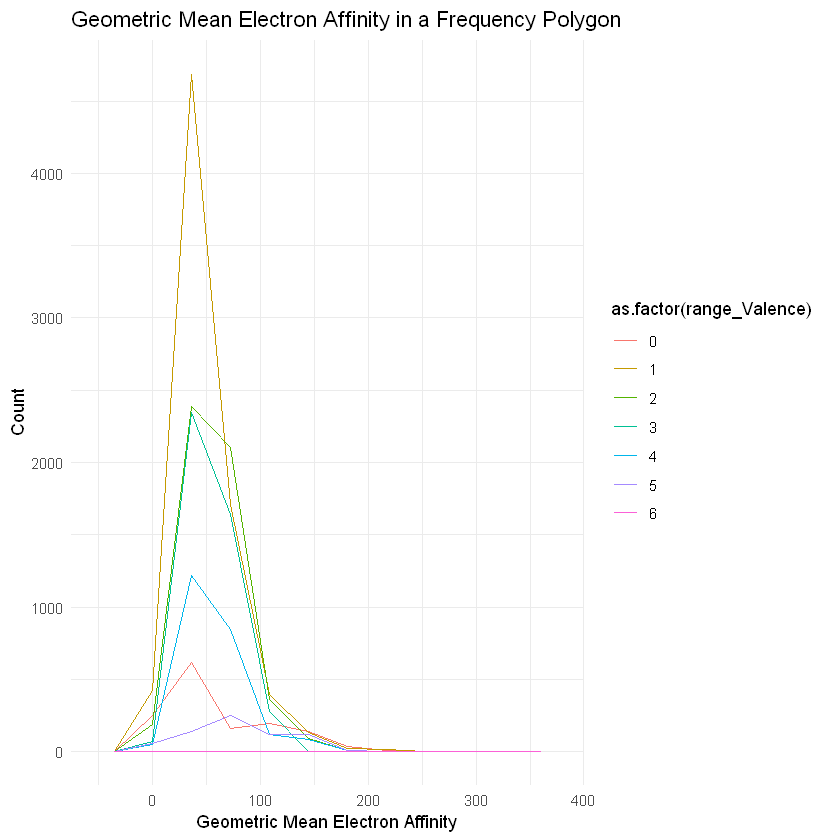

In [41]:
ggplot(aes(x = gmean_ElectronAffinity, color = as.factor(range_Valence)), data = data) +
geom_freqpoly(bins = 10) +
xlab('Geometric Mean Electron Affinity') +
ylab('Count') +
ggtitle('Geometric Mean Electron Affinity in a Frequency Polygon')

Pretty interesting count distribution of **Geometric Mean of Electron Affinity**, with **Range Valence 1** having the highest count and **Range Valence 6** having the lowest count.

Correlation plot follows now.

In [42]:
data_electron_affinity <- data[, c('mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity', 'range_ElectronAffinity', 'wtd_range_ElectronAffinity', 'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'critical_temp')]

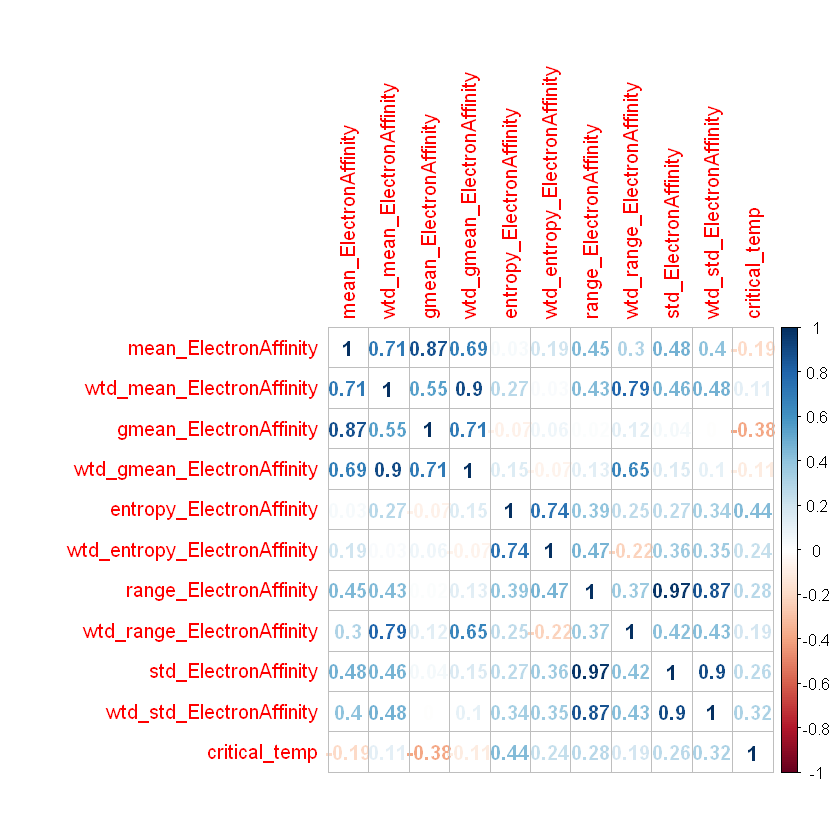

In [43]:
corr_plot_electron_affinity <- cor(data_electron_affinity)
corrplot(corr_plot_electron_affinity, method = "number")

Not much of a correlation at all. Perhaps, this isn't an important predictor at all.

**Possible Interaction between variables :**

1) range_ElectronAffinity and std_ElectronAffinity.

2) gmean_ElectronAffinity and mean_ElectronAffinity.

3) std_ElectronAffinity and wtd_std_ElectronAffinity.

# 3. Statistical Tests for Normality <a class="anchor" id="sec_3"></a>

Let us check how many of these variables are **normally distributed**, in an attempt to see if fitting a **Linear Regression** model would be a good choice or not!

In [44]:
for(cols in 1:ncol(data)) {
    
    print(shapiro.test(data[1:5000, cols]))
} 


	Shapiro-Wilk normality test

data:  data[1:5000, cols]
W = 0.87416, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  data[1:5000, cols]
W = 0.98095, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  data[1:5000, cols]
W = 0.85687, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  data[1:5000, cols]
W = 0.9362, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  data[1:5000, cols]
W = 0.6816, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  data[1:5000, cols]
W = 0.93322, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  data[1:5000, cols]
W = 0.96611, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  data[1:5000, cols]
W = 0.81396, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  data[1:5000, cols]
W = 0.9007, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  data[1:5000, cols]
W = 0.96224, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  data[1:5000, cols]
W = 0.9549, p-value < 2.2e-16


	Shapiro-Wilk normality 

All the **p-values** suggest that all the variables are **distributed normally**. We definitely can use Linear Regression on this dataset. Let's move on to Feature Selection.

# 4. Feature Selection <a class="anchor" id="sec_4"></a>

As Data Scientists, we have all been there, trying to identify the important features from the given dataset, which could potentially be the difference between a **good and a great model**. Feature selection is done almost always to **improve prediction accuracy**, i.e. **reducing MSE in Regression** and **reduce misclassifications in Classification** problems.

Being one of the most important steps in Machine Learning, Feature Selection can have long lasting effects on **model performance**. Irrelevant features pull your **model down and hence, impact it negatively**. Some of the benefits of Feature Selection are as follows :

1) Improves Accuracy

2) Reduces Overfitting

3) Reduction in Model Training Time

For example, let's consider the problem of **predicting a student's mark or performance in the final exams**, say, we have features as **attendance, name, roll number, unit test marks, CGPA etc**. Intuitively, you would think that student's final exam marks wouldn't be **dependent on his name and roll number**! But **including these variables in your final model** will have **negative effect on model performance**.

We will be making use of **Stepwise Regression - Backward Selection, Decision Trees and Gradient Boosted Machines** to get a taste of which technique gives us the best set of variables for feature selection.

Reference - https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

## Stepwise Regression - Both

It is an **automated** technique which performs feature selection **iteratively**. In every iteration, the algorithm decides whether to **add a variable from the pool of variables** or **subtract a variable from the existing model**. The algorithm is able to decide this based on the **estimator known as Akaike Information Criterion and Bayesian Information Criterion**, where it works to **minimize** them until the **lowest value** is reached. 

In short, AIC deals with the **risk of both overfitting and underfitting**. *AIC = 2k - 2ln(L^)*, where **k is the number of parameters and L^ is the maximum value of the likelihood function**.

At the **lowest** AIC or BIC value, the features kept in the model are selected as the **best set of features for that dataset**! There are **three types of Stepwise Regression possible** :

1) Forward - The model starts with just the **response variable**, regressed with **1** and from the next iteration, the features keep getting added to the model, depending on AIC or BIC.

2) Backward - The model starts with the **response variable**, regressed with **all the available features** in the data and then in every iteration, calculates **individual feature contribution to AIC** and then **removes the feature with the highest contribution**, thereby, **minimizing AIC**.

3) Bidirectional - It's a combination of **Forward and Backward**, as it tests at each iteration wheter to add or remove variables.

It goes without saying that Stepwise Regression is far from perfect, having the following limitations : 

1) The tests are said to be **biased**, since they are based on the **same data**.

2) May create **over-simplifications** of the real models of data.

We will be making use of **Both** for our **Feature Selection task**. Let's see how this goes, it takes about 5-7 minutes to run, given the huge number of features that we have.

In [45]:
step(lm(critical_temp ~., data = data), direction = 'both')

Start:  AIC=122021.5
critical_temp ~ number_of_elements + mean_atomic_mass + wtd_mean_atomic_mass + 
    gmean_atomic_mass + wtd_gmean_atomic_mass + entropy_atomic_mass + 
    wtd_entropy_atomic_mass + range_atomic_mass + wtd_range_atomic_mass + 
    std_atomic_mass + wtd_std_atomic_mass + mean_fie + wtd_mean_fie + 
    gmean_fie + wtd_gmean_fie + entropy_fie + wtd_entropy_fie + 
    range_fie + wtd_range_fie + std_fie + wtd_std_fie + mean_atomic_radius + 
    wtd_mean_atomic_radius + gmean_atomic_radius + wtd_gmean_atomic_radius + 
    entropy_atomic_radius + wtd_entropy_atomic_radius + range_atomic_radius + 
    wtd_range_atomic_radius + std_atomic_radius + wtd_std_atomic_radius + 
    mean_Density + wtd_mean_Density + gmean_Density + wtd_gmean_Density + 
    entropy_Density + wtd_entropy_Density + range_Density + wtd_range_Density + 
    std_Density + wtd_std_Density + mean_ElectronAffinity + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + entr


Call:
lm(formula = critical_temp ~ number_of_elements + mean_atomic_mass + 
    wtd_mean_atomic_mass + gmean_atomic_mass + wtd_gmean_atomic_mass + 
    entropy_atomic_mass + range_atomic_mass + std_atomic_mass + 
    wtd_std_atomic_mass + mean_fie + wtd_mean_fie + gmean_fie + 
    wtd_gmean_fie + entropy_fie + wtd_entropy_fie + range_fie + 
    wtd_range_fie + std_fie + mean_atomic_radius + wtd_mean_atomic_radius + 
    wtd_gmean_atomic_radius + entropy_atomic_radius + wtd_entropy_atomic_radius + 
    range_atomic_radius + wtd_range_atomic_radius + std_atomic_radius + 
    wtd_std_atomic_radius + mean_Density + gmean_Density + wtd_gmean_Density + 
    entropy_Density + wtd_entropy_Density + range_Density + std_Density + 
    wtd_std_Density + mean_ElectronAffinity + wtd_mean_ElectronAffinity + 
    gmean_ElectronAffinity + wtd_gmean_ElectronAffinity + entropy_ElectronAffinity + 
    wtd_entropy_ElectronAffinity + range_ElectronAffinity + wtd_range_ElectronAffinity + 
    std_ElectronA

Notice that at the start of the execution, the model AIC is **122021.5** and by the end of the execution, the algorithm has only managed to reduce the AIC to **122011.4** which is very poor! The model also calculates **Sum of Squares, Residual Sum of Squares** for each variable at each iteration.

In short, the stepwise regression has been only able to reduce the number of features from **81 to 65**. We can't possible be training our data on **65 features**, that's too many features to be honest! Sadly, this technique is not going to work for us.

We shall now explore **CART** implementation of **Decision Trees**.

## Decision Trees

It is one of the most widely used techniques in the world of Machine Learning, Statistics and Data Science as a whole. Decision Trees are a goto choice if you wish to have **great model performance as well as high interpretability**. One amazing thing about Decision Trees is that it can do both **Regression** and **Classification**! 

The model starts by at the **root node**, where baed on the feature at the root, it splits the data into **two** children nodes depending on condition at the root (e.g. Income > 68000). When constructing Decision Trees, algorithms usually work in a **top-bottom** approach. Some of the metrics that Decision Trees use to split nodes are :

1) Gini Impurity - Given the randomly labelled data in the distribution of the data, it is the measure of how often a randomly chosen item from this distribution is incorrectly labelled. This is mostly used for **Classification** problems.

2) Information Gain - **Entropy** and Information Gain is calculated at each node and the node with the **highest** information gain is chosen as the node which is split.

There are a few advantages of using DEcision Trees :

1) Simple to understand and interpret.

2) Little Data Preparation.

3) Able to do both Regression and Classification.

4) Performs well on Large Datasets.

Although Decision Trees might give you a false feeling that it's the best algorithm out there, it's not the case as it has the following **limitations** :

1) Non-Robust, i.e. a small change in the training data can have massive effect on predictions.

2) No guarantee of a **Globally Optimal Tree** as it uses **Greedy Algorithm**.

3) Prone to **Overfitting**.

Let's make us of the **rpart2** CART implementation which makes use of **maximum depth** instead of **cp (complexity parameter)** which is used by **rpart** CART implementation.

In [46]:
set.seed(123)
model_DT <- train(critical_temp ~., data = data, method = 'rpart2')
imp_DT <- varImp(model_DT)
print(imp_DT)

rpart2 variable importance

  only 20 most important variables shown (out of 81)

                              Overall
range_ThermalConductivity      100.00
wtd_std_ThermalConductivity     93.89
range_atomic_radius             93.86
wtd_entropy_Valence             90.46
std_ThermalConductivity         89.86
wtd_std_ElectronAffinity        86.20
wtd_gmean_Valence               82.92
wtd_mean_Valence                81.96
wtd_entropy_ElectronAffinity    64.22
wtd_gmean_ThermalConductivity   54.36
wtd_std_Valence                 52.73
wtd_range_ElectronAffinity      47.86
wtd_gmean_ElectronAffinity      47.16
wtd_mean_ThermalConductivity    46.12
std_Density                     18.26
std_atomic_mass                 17.74
wtd_range_Valence               14.31
wtd_std_atomic_radius            0.00
std_fie                          0.00
range_atomic_mass                0.00


This algorithm takes about 3-4 minutes and is comparatively faster than stepwise, also, see that it returns a **list of important features sorted by an Overall score (importance?)**. We can plot this to get a better understanding of the results. 

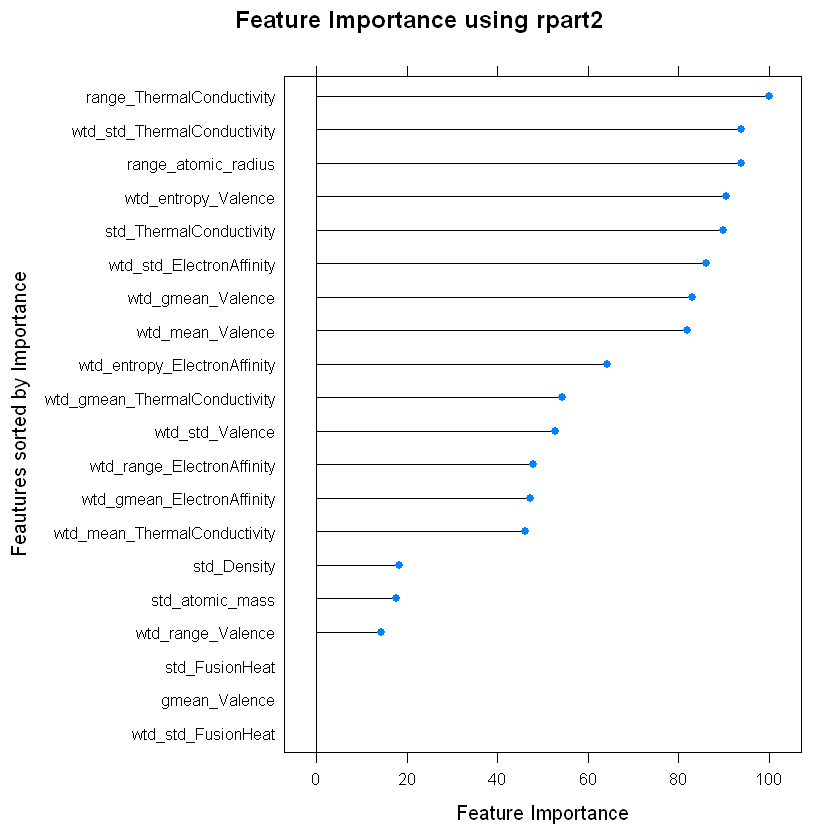

In [47]:
plot(imp_DT, top = 20, main = 'Feature Importance using rpart2', 
     xlab = 'Feature Importance', ylab = 'Feautures sorted by Importance')

See how **range_ThermalConductivity, wtd_std_ThermalConductivity and range_atomic_mass** clinch the top 3 spots. Our EDA may have been onto something, as we predicted something similar. To get a second opinion, we could use **Gradient Boosting Machines** to compare the selected features.

## Gradient Boosting Machines

Just like Decision Trees, Gradient Boosting Machines or as it is commonly called, 'gbm' which allows for the **optimization** of an arbitrary **differentiable loss function**. The algorithm is such that it first makes a **single node**, which is usually the **average** of the continuous variable we're trying to predict. Based on the **errors** of the previous tree/node, the next tree/node is built. It's size can be greater than the previous one, making it different from **AdaBoost**. Gradient Boost also **scales** the trees by the **same amount**.

This process of making the trees and scaling it continues till the number of trees asked for is reached or the **best fit** is attained. At each iteration, the algorithm takes a small step in the right direction with respect to prediction. Gradient Boosting Machine makes use of something called as **Regularizatioin**, which reduces **Overfitting**. It has several factors :

1) Shrinkage or **Learning Rate**.

2) Stochastic Gradient Boosting.

3) Number of observations in leaves.

4) Penalize Complexity of Tree.

There are some advantages of this implementation :

1) State of the art prediction on Training data.

2) Extremely flexible, with an option to optimize multiple loss functions and several hyperparameter tuning options.

3) Handles **missing data**.

There are obviously some limitations as well :

1) Very prone to **Overfitting**, must be used with **cross-validation** to cancel that out.

2) Computationally heavy and often less readable, interpretable than Decision Trees.

In [48]:
model_GBM <- train(critical_temp ~., data = data, method = 'gbm')
imp_GBM <- varImp(model_GBM)
print(imp_GBM)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1     1065.7751             nan     0.1000  120.4218
     2      967.8529             nan     0.1000   97.5580
     3      887.1536             nan     0.1000   79.8176
     4      817.5380             nan     0.1000   70.1440
     5      759.1718             nan     0.1000   59.0956
     6      709.9747             nan     0.1000   49.0908
     7      666.2073             nan     0.1000   44.1057
     8      628.8094             nan     0.1000   37.0003
     9      596.2557             nan     0.1000   31.9609
    10      568.6737             nan     0.1000   27.0689
    20      427.7884             nan     0.1000    8.5018
    40      343.2492             nan     0.1000    1.9032
    60      310.7797             nan     0.1000    1.0273
    80      292.7884             nan     0.1000    0.6115
   100      280.9961             nan     0.1000    0.4844
   120      272.2264             nan     0.1000    0.3739
   140      26

gbm variable importance

  only 20 most important variables shown (out of 81)

                                Overall
range_ThermalConductivity       100.000
range_atomic_radius              30.503
wtd_gmean_ThermalConductivity    19.633
wtd_entropy_Valence              11.638
wtd_entropy_atomic_mass          11.545
wtd_mean_ThermalConductivity      9.321
wtd_mean_Valence                  8.750
gmean_Valence                     8.352
wtd_gmean_Valence                 7.571
wtd_std_ElectronAffinity          6.920
std_atomic_mass                   5.420
wtd_std_ThermalConductivity       4.062
wtd_gmean_ElectronAffinity        3.795
wtd_std_Valence                   2.670
std_Density                       2.596
wtd_entropy_ThermalConductivity   2.524
entropy_FusionHeat                2.513
gmean_Density                     2.095
std_ElectronAffinity              2.091
mean_ThermalConductivity          1.918


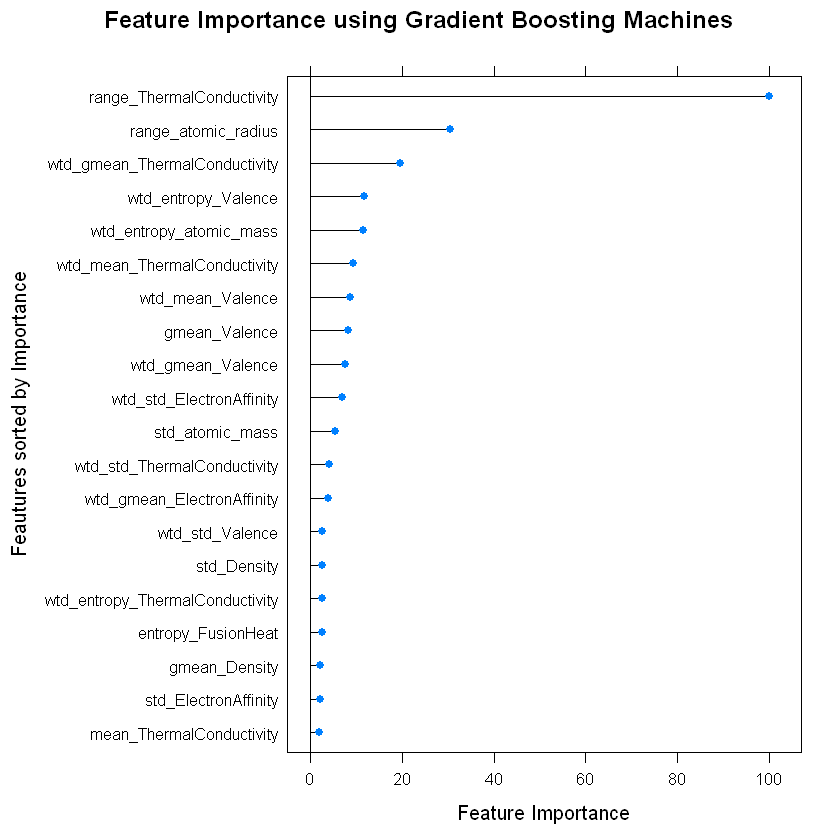

In [49]:
plot(imp_GBM, top = 20, main = 'Feature Importance using Gradient Boosting Machines', 
     xlab = 'Feature Importance', ylab = 'Feautures sorted by Importance')

# Splitting the Data into Test and Train

Great, so we have our **important features** from the Feature Selection part above. Now, we need to split our data into **test** and **train**. Why do we do that, I hear you ask? It's simple, on the **training** data, we **build** our model, meaning, we make **inferences** on the data, how it is to be **split**, what **rules** must it follow etc. 

Then, we have the set of inferences and rules, we see how well the **model does on the training data**. We would expect it to do well since it was trained on the same data, if it does **too well on the same data, that is known as Overfitting**. To see how good the model actually is, we then make **predictions on the test data** and using metrics like **Accuracy, ROC Curve's AUC, Sensitivity, Specificity, Mean Squared Error** etc. we can come find out if the model we made is giving us the desired result or not.

So, that said, let us split the data into test and train. Let's store the important features and our response in the `data_imp_features` variable.

In [50]:
data_imp_features <- data[, c('range_ThermalConductivity', 'wtd_std_ThermalConductivity', 'range_atomic_radius', 'wtd_entropy_Valence', 'std_ThermalConductivity', 'wtd_std_ElectronAffinity', 'wtd_gmean_Valence', 'wtd_range_ElectronAffinity', 'wtd_entropy_ElectronAffinity', 'wtd_gmean_ThermalConductivity', 'wtd_std_Valence', 'wtd_gmean_ElectronAffinity', 'wtd_mean_ThermalConductivity', 'std_Density', 'std_atomic_mass', 'wtd_range_Valence', 'critical_temp')]

Making use of the `caret` package's `sample.split` function, let's split the data into test and train. We will split the data into **80% training** and **20% test**.

In [51]:
data_sample <- sample.split(data_imp_features, SplitRatio = 0.8)

data_train <- subset(data_imp_features, data_sample == TRUE)
data_test <- subset(data_imp_features, data_sample == FALSE)

In [52]:
print(paste('Number of rows in Training data', nrow(data_train)))

[1] "Number of rows in Training data 16261"


In [53]:
print(paste('Number of rows in Training data', nrow(data_test)))

[1] "Number of rows in Training data 5002"


Data is split now, it's time to buil some models for prediction.

# 5. Predicting Critical Temperature of Superconductors <a class="anchor" id="sec_5"></a>

## Linear Regression

Linear Regression is one of the most common **Supervised Machine Learning** algorithms out there which is used for making predictions for **continuous variables**. It is a technique to measure the relationship between a **response** and **predictor** variables. When there are mutiple variables, which is the case in all real world problems, it is known as **Multiple Regression**.

It is based on **leastsquare estimation**, in which **minimizing sum of squared distances** while choosing the best coefficients and for the analysis to happen, Linear Regression requires atleast 5 cases per independent variable.

Linear Regression makes some assumptions like:

1) Weak exogeneity - Makes the assumption that **predictors** are **fixed values**, rather than a **random variable**.

2) Linearity - Essentially, there should be a linear relationship between the **response** **predictor** variables.

3) Outliers - There should be as few outliers in the data, as they force the distribution to be **non-linear**, thereby forcing the response and predictor variables to have a non-linear relationship.

4) Muticolinearity - This means that there is a **high correlation** between the **independent variables**.

5) No Autocorrelation - The basic assumption that **error** corresponding to one observation should **not be correlated** with any other observation.

Linear Regression also assumes some more things like, the **target** variable has a **Gaussian Distribution**. Below, we will fit a linear model to out data of important features and try to predict the critical temperature.

In [54]:
data_train_lm <- lm(critical_temp ~., data = data_train)
summary(data_train_lm)


Call:
lm(formula = critical_temp ~ ., data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-114.87  -12.52    0.04   11.69  201.38 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    8.858e+00  1.385e+00   6.396 1.64e-10 ***
range_ThermalConductivity      4.564e-02  9.370e-03   4.871 1.12e-06 ***
wtd_std_ThermalConductivity   -8.515e-02  1.843e-02  -4.621 3.86e-06 ***
range_atomic_radius            1.038e-01  5.518e-03  18.812  < 2e-16 ***
wtd_entropy_Valence            3.381e+01  1.723e+00  19.625  < 2e-16 ***
std_ThermalConductivity       -5.835e-02  2.218e-02  -2.630  0.00854 ** 
wtd_std_ElectronAffinity       1.010e-01  1.298e-02   7.783 7.50e-15 ***
wtd_gmean_Valence             -2.305e+00  3.187e-01  -7.234 4.88e-13 ***
wtd_range_ElectronAffinity    -2.535e-01  1.708e-02 -14.845  < 2e-16 ***
wtd_entropy_ElectronAffinity  -4.006e+01  1.636e+00 -24.483  < 2e-16 ***
wtd_gmean_ThermalConductivity 

We see that **almost all** variables are important. The model is decent enough that the **R-squared** is **0.65**.

Let's now check some **model diagnostics**.

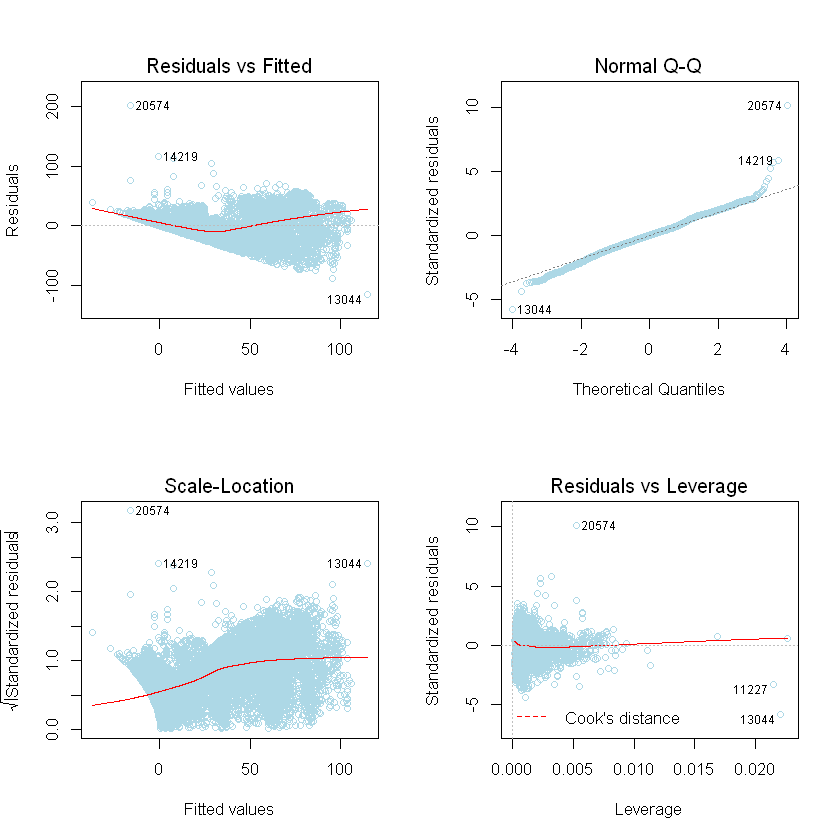

In [55]:
par(mfrow = c(2,2))
plot(data_train_lm, col = 'light blue')

**Theoretical Qiantiles** are distributed **normally** but the **Residuals vs Fitted** plot isn't as **randomly scatterred** as we would like. So that's where our model is performing poorly, since there are **some interactions** that are not getting accounted for in our model.

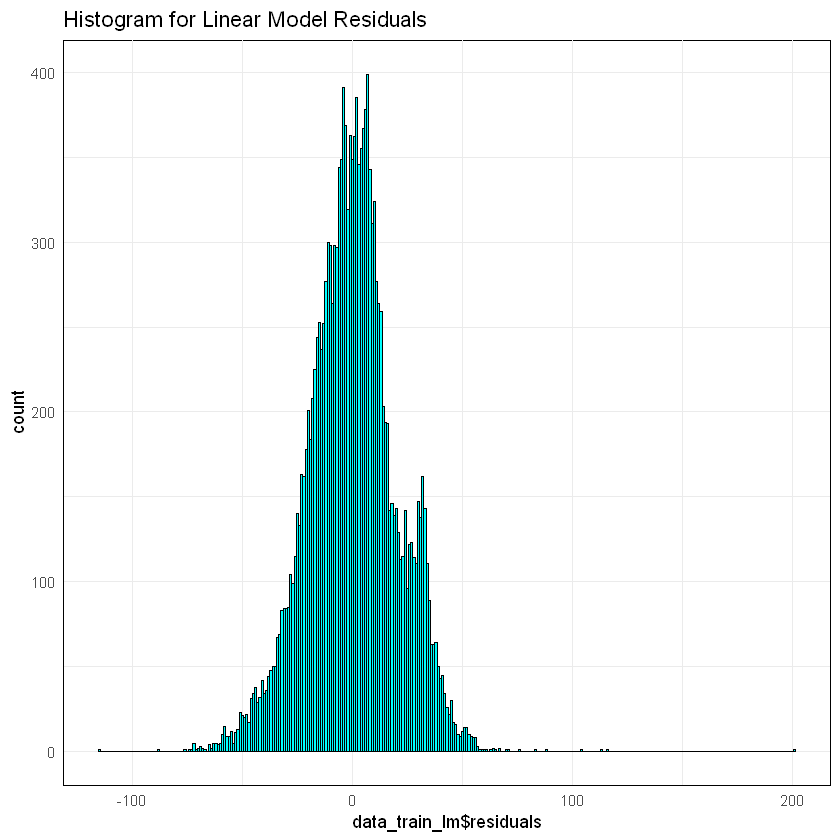

In [56]:
ggplot(data=data_train, aes(data_train_lm$residuals)) +
geom_histogram(binwidth = 1, color = 'black', fill = 'cyan') +
theme(panel.background = element_rect(fill = 'white'),
axis.line.x=element_line(),
axis.line.y=element_line()) +
ggtitle('Histogram for Linear Model Residuals')

Further, the model **residuals or errors** are also normally distributed, this is a good sign. It's time to predict on our tets data and get the **MSE and Accuracy** of our model.

In [57]:
data_test$critical_temp_lm <- predict(data_train_lm, data_test)

In [58]:
head(data_test)

,range_ThermalConductivity,wtd_std_ThermalConductivity,range_atomic_radius,wtd_entropy_Valence,std_ThermalConductivity,wtd_std_ElectronAffinity,wtd_gmean_Valence,wtd_range_ElectronAffinity,wtd_entropy_ElectronAffinity,wtd_gmean_ThermalConductivity,wtd_std_Valence,wtd_gmean_ElectronAffinity,wtd_mean_ThermalConductivity,std_Density,std_atomic_mass,wtd_range_Valence,critical_temp,critical_temp_lm
2,429.9734,139.6309,205,1.047221,198.5546,41.66762,2.210679,81.20786,0.8386665,0.6197346,0.4686063,101.16640,61.37233,3767.403,47.09463,1.128571,26.0,35.38630
8,399.9734,138.4800,171,1.029175,166.7424,41.94831,2.232679,81.33529,0.7793966,0.6250039,0.4446966,99.84617,61.18662,3402.856,44.28946,1.114286,33.0,34.08093
16,429.9734,143.8968,205,1.053346,198.5546,41.77588,2.124829,81.20786,0.8993557,0.6223011,0.5503246,101.50408,63.08662,3767.403,47.09463,1.114286,27.0,32.73761
17,399.9734,166.8227,205,1.285132,154.8943,50.33210,2.063362,76.58192,0.7546300,1.2026771,0.2664694,82.05216,103.39893,3052.920,41.80901,1.000000,82.0,65.99412
19,399.9734,138.4377,171,1.048834,166.7424,42.55789,2.226222,81.28864,0.7776572,0.6294410,0.4409521,98.41196,61.34376,3402.856,44.28946,1.100000,39.0,34.96279
25,399.9734,138.2666,171,1.108993,166.7424,44.89258,2.200580,81.10207,0.7686561,0.6475068,0.4244444,92.87821,61.97233,3402.856,44.28946,1.042857,18.3,37.94798


In [59]:
print(paste('MSE for Linear Regression is : ', mean((data_test$critical_temp - data_test$critical_temp_lm) ^ 2)))

[1] "MSE for Linear Regression is :  414.746350603449"


In [60]:
print(paste('Accuracy for Linear Regression is : ', cor(data_test$critical_temp,data_test$critical_temp_lm) * 100))

[1] "Accuracy for Linear Regression is :  81.0079818675541"


So, our Linear Regression model is doing pretty well with an **MSE of 414.74 and overall Accuracy of 81**.

## Decision Trees 

It is one of the most widely used techniques in the world of Machine Learning, Statistics and Data Science as a whole. Decision Trees are a goto choice if you wish to have **great model performance as well as high interpretability**. One amazing thing about Decision Trees is that it can do both **Regression** and **Classification**! 

The model starts by at the **root node**, where baed on the feature at the root, it splits the data into **two** children nodes depending on condition at the root (e.g. Income > 68000). When constructing Decision Trees, algorithms usually work in a **top-bottom** approach. Some of the metrics that Decision Trees use to split nodes are :

1) Gini Impurity - Given the randomly labelled data in the distribution of the data, it is the measure of how often a randomly chosen item from this distribution is incorrectly labelled. This is mostly used for **Classification** problems.

2) Information Gain - **Entropy** and Information Gain is calculated at each node and the node with the **highest** information gain is chosen as the node which is split.

There are a few advantages of using DEcision Trees :

1) Simple to understand and interpret.

2) Little Data Preparation.

3) Able to do both Regression and Classification.

4) Performs well on Large Datasets.

Although Decision Trees might give you a false feeling that it's the best algorithm out there, it's not the case as it has the following **limitations** :

1) Non-Robust, i.e. a small change in the training data can have massive effect on predictions.

2) No guarantee of a **Globally Optimal Tree** as it uses **Greedy Algorithm**.

3) Prone to **Overfitting**.

We will make use of **ANOVA** method for our DEcision Tree implementation since our response variable is **numeric**. Also, by default we will consider the **complexity parameter as 0.01**.

In [61]:
model_CART <- rpart(critical_temp ~., data = data_train, method = 'anova', control = rpart.control(cp = 0.01))

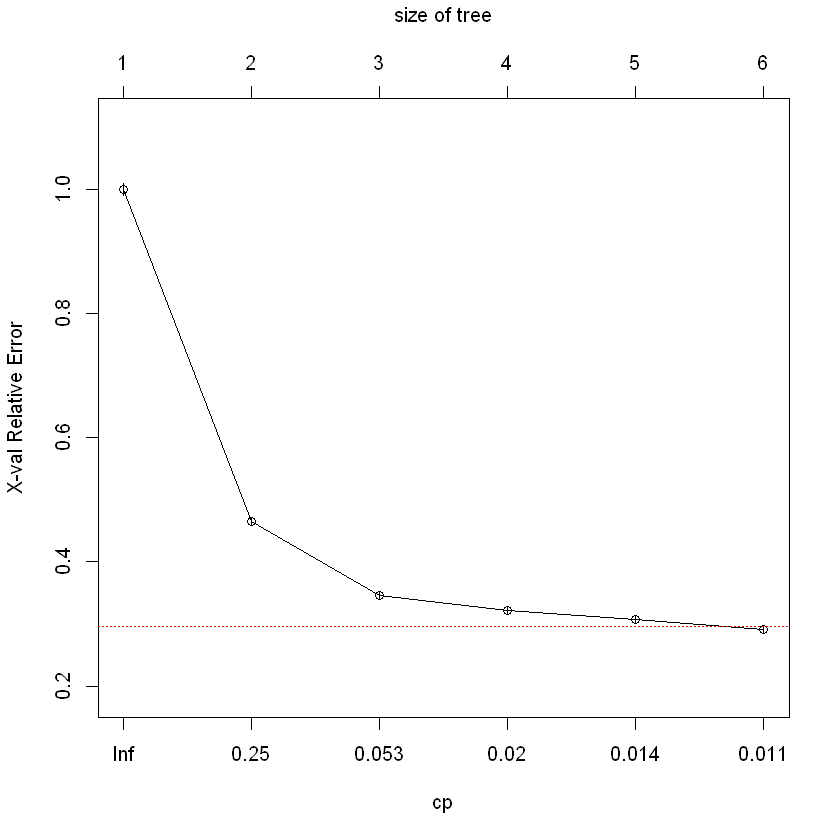

In [62]:
plotcp(model_CART, col = 'red')

Bullseye! We guessed the best complexity parameter for our model, this should definitely give us a better prediction than Linear Regression. Let's further optimize our tree by **pruning** it with the **minimum complexity parameter**. 

In [63]:
cp_min <- model_CART$cptable[which.min(model_CART$cptable[,"xerror"]),"CP"]

In [64]:
model_CART_pruned <- prune(model_CART, cp = cp_min)

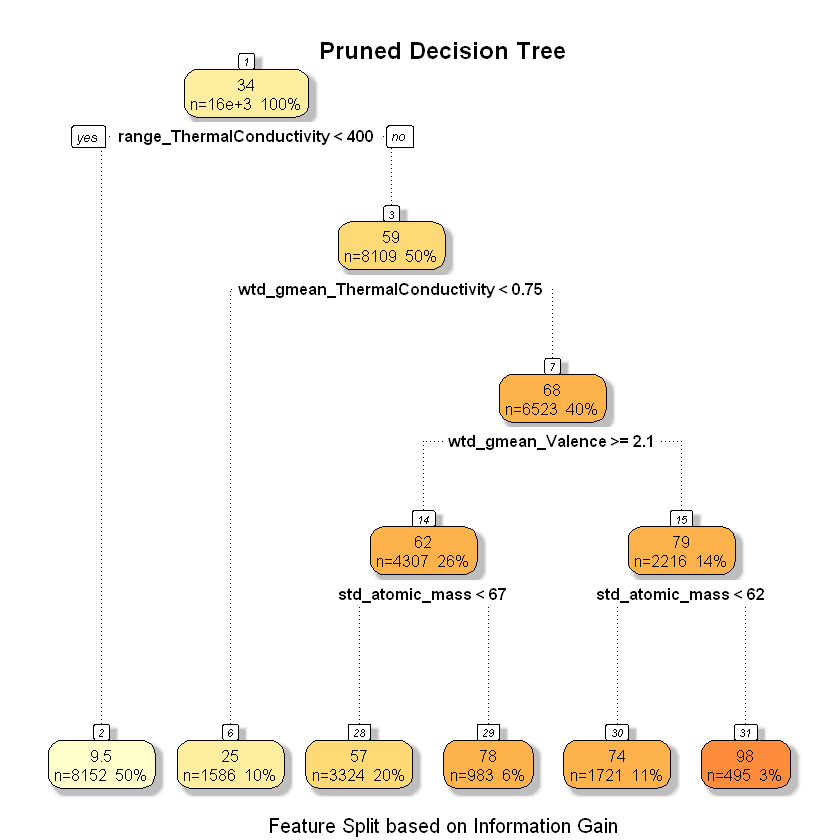

In [65]:
fancyRpartPlot(model_CART_pruned, main = 'Pruned Decision Tree', 
               sub = 'Feature Split based on Information Gain', palettes = 'YlOrRd')

A decent tree if you ask me, with all the nodes having similar weights and data distribution. We can now predict on our test set and see the MSE and Accuracy by ourself.

In [66]:
data_test$critical_temp_DT <- predict(object = model_CART_pruned, newdata = data_test, method = 'anova')

In [67]:
head(data_test)

,range_ThermalConductivity,wtd_std_ThermalConductivity,range_atomic_radius,wtd_entropy_Valence,std_ThermalConductivity,wtd_std_ElectronAffinity,wtd_gmean_Valence,wtd_range_ElectronAffinity,wtd_entropy_ElectronAffinity,wtd_gmean_ThermalConductivity,wtd_std_Valence,wtd_gmean_ElectronAffinity,wtd_mean_ThermalConductivity,std_Density,std_atomic_mass,wtd_range_Valence,critical_temp,critical_temp_lm,critical_temp_DT
2,429.9734,139.6309,205,1.047221,198.5546,41.66762,2.210679,81.20786,0.8386665,0.6197346,0.4686063,101.16640,61.37233,3767.403,47.09463,1.128571,26.0,35.38630,25.21657
8,399.9734,138.4800,171,1.029175,166.7424,41.94831,2.232679,81.33529,0.7793966,0.6250039,0.4446966,99.84617,61.18662,3402.856,44.28946,1.114286,33.0,34.08093,25.21657
16,429.9734,143.8968,205,1.053346,198.5546,41.77588,2.124829,81.20786,0.8993557,0.6223011,0.5503246,101.50408,63.08662,3767.403,47.09463,1.114286,27.0,32.73761,25.21657
17,399.9734,166.8227,205,1.285132,154.8943,50.33210,2.063362,76.58192,0.7546300,1.2026771,0.2664694,82.05216,103.39893,3052.920,41.80901,1.000000,82.0,65.99412,73.74793
19,399.9734,138.4377,171,1.048834,166.7424,42.55789,2.226222,81.28864,0.7776572,0.6294410,0.4409521,98.41196,61.34376,3402.856,44.28946,1.100000,39.0,34.96279,25.21657
25,399.9734,138.2666,171,1.108993,166.7424,44.89258,2.200580,81.10207,0.7686561,0.6475068,0.4244444,92.87821,61.97233,3402.856,44.28946,1.042857,18.3,37.94798,25.21657


In [68]:
print(paste('MSE for Decision Trees is : ', mean((data_test$critical_temp - data_test$critical_temp_DT) ^ 2)))

[1] "MSE for Decision Trees is :  362.616365161796"


In [69]:
print(paste('Accuracy for Decision Trees is : ', cor(data_test$critical_temp,data_test$critical_temp_DT) * 100))

[1] "Accuracy for Decision Trees is :  83.6296665810102"


Not a huge difference but with a **MSE of 362.61 and Accuracy of 83.62**, we can confidently say that we have made a significant improvement over our previous model, Linear Regression.

## XGBoost

XGBoost, or simply put, everyone's goto algorithm in Kaggle competitions since it has been a proven winner on many, many occassions. XGBoost stands for **Xtreme Gradient Boosting** and yeah you guessed it, it's a **Boosting Technique**. This algorithm, building on the classic idea of boosting, where **trees are build sequentially instead of parallelly(like in the case of Random Forest which is a Bagging Technique), making up for the errors of the previous trees and thus improving on them**.

Some of the features of XGBoost model are :

1) **Gradient Boosting** with **Learning Rate**

2) **Stochastic Gradient Boosting** with **Sub-sampling**

3) **Regularized Gradient Boosting** with **L1** and **L2 Regularization**.



The library also focusses on computation speed, it's **atleast 10 times faster than other boosting algorithms** because of some of the following system features :

1) **Parallelization** - All cores are used simultaneously.

2) **Distributed Computing** - Cluster of Machines can be used.

3) **Cache Optimization** - Algorithm makes the best use of available hardware.



But what is so different about the algorithm itself? Some of the Algorithm features include :

1) **Sparse Aware** - Implementation that handles missing data on it's own.

2) **Block Structure** - Supports Parallelization.

3) **Continued Training** - Further boost an already fitted model.

All in all, XGBoost is a fabulous model that can be used to estimate complex Machine Learning problems. The framework takes in input only as a **matrix** as it needs to convert it to a **sparse matrix internally**.

In [70]:
set.seed(123)

In [71]:
features_train <- data_train[, 1:16]
response_train <-  data_train$critical_temp

In [72]:
features_test <- data_test[, 1:16]
response_test <-  data_test$critical_temp

Let's now just get the feel of what we can achieve with XGBoost by using a **Cross-Validation** trainer on our data and get a sample **RMSE(Root Mean Squared Error)** on our training data.

We will be using **5 cross-validation folds**, **10,000 rounds of boosting or trees** and **an early stopping of 10, meaning, we will terinate the algorithm if the RMSE does not improve in 10 successive trees**.

In [73]:
model_XGB_CV <- xgb.cv(
  data = as.matrix(features_train),
  label = as.matrix(response_train),
  nrounds = 10000,
  nfold = 5,
  objective = "reg:linear",  
  verbose = 0,
  early_stopping_rounds = 10
)

Let's gather all RMSE scores on training and test set.

In [74]:
model_XGB_CV$evaluation_log %>%
  dplyr::summarise(
    ntrees.train = which(train_rmse_mean == min(train_rmse_mean))[1],
    rmse.train   = min(train_rmse_mean),
    ntrees.test  = which(test_rmse_mean == min(test_rmse_mean))[1],
    rmse.test   = min(test_rmse_mean),
  )

ntrees.train,rmse.train,ntrees.test,rmse.test
198,5.133262,188,10.53216


So, our model made **198 and 188 trees for train and test respectively, also gave train RMSE as 5.1 and test RMSE as 10.58**. Not bad at all! Let's plot the results.

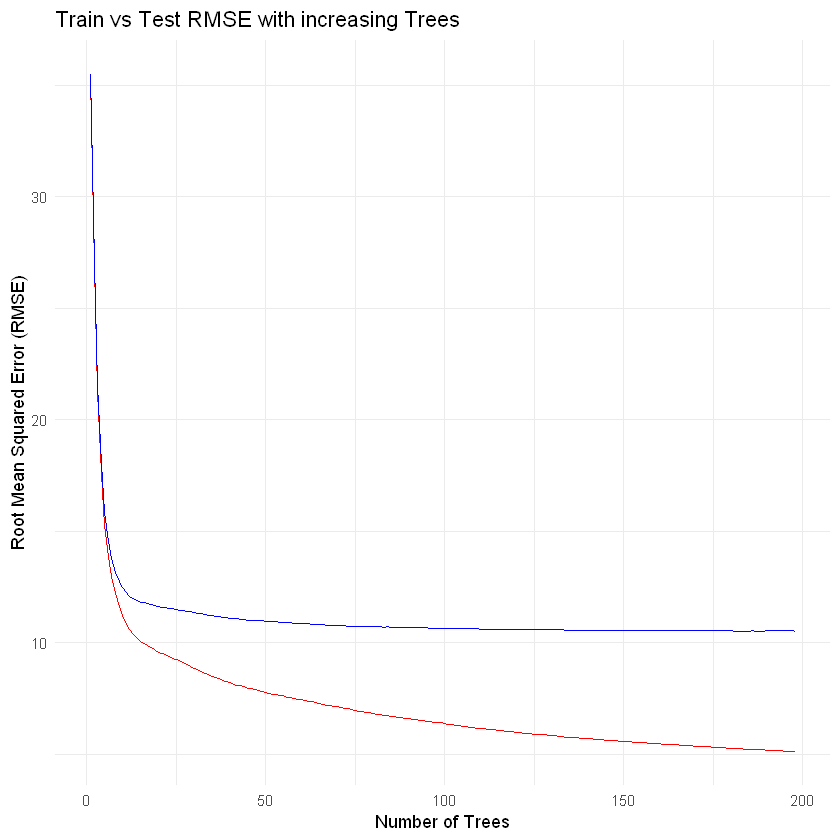

In [75]:
ggplot(model_XGB_CV$evaluation_log) +
  geom_line(aes(iter, train_rmse_mean), color = "red") +
  geom_line(aes(iter, test_rmse_mean), color = "blue") +
  ggtitle('Train vs Test RMSE with increasing Trees') +
  xlab('Number of Trees') +
  ylab('Root Mean Squared Error (RMSE)')

Clear divide here, with train and test RMSE. Let us now supply some **parameters** to our model training in an attempt to **reduce RMSE**.

In [76]:
params <- list(
    eta = .1,
    max_depth = 5,
    min_child_weight = 2,
    subsample = .8,
    colsample_bytree = .9
  )

In [77]:
model_XGB_Improved_CV <- xgb.cv(
  params = params,
  data = as.matrix(features_train),
  label = as.matrix(response_train),
  nrounds = 10000,
  nfold = 5,
  objective = "reg:linear",  
  verbose = 0 
)

In [78]:
model_XGB_Improved_CV$evaluation_log %>%
  dplyr::summarise(
    ntrees.train = which(train_rmse_mean == min(train_rmse_mean))[1],
    rmse.train   = min(train_rmse_mean),
    ntrees.test  = which(test_rmse_mean == min(test_rmse_mean))[1],
    rmse.test   = min(test_rmse_mean),
  )

ntrees.train,rmse.train,ntrees.test,rmse.test
9947,4.032902,1422,10.26096


Look at the model performance! How the number of trees in are now **9947 and 1422 in training and test set and also RMSE of 4.03 and 10.26 on training and test set**. Great improvement in our model just by supplying a bunch of parameters.

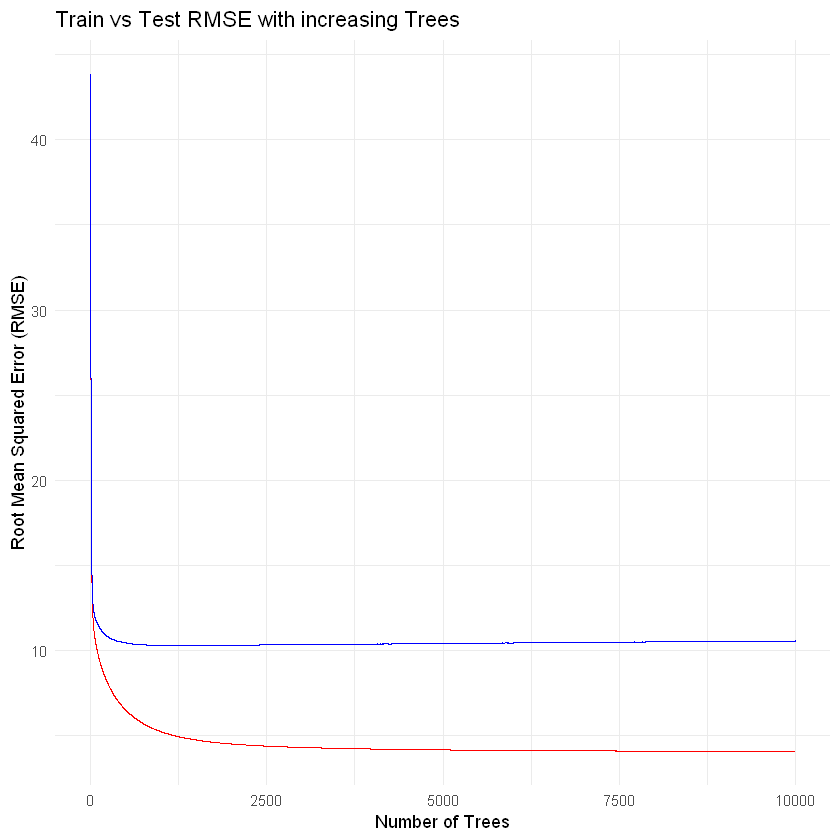

In [79]:
ggplot(model_XGB_Improved_CV$evaluation_log) +
  geom_line(aes(iter, train_rmse_mean), color = "red") +
  geom_line(aes(iter, test_rmse_mean), color = "blue") +
  ggtitle('Train vs Test RMSE with increasing Trees') +
  xlab('Number of Trees') +
  ylab('Root Mean Squared Error (RMSE)')

Time to train our model for prediction now. We will use **10,000** trees with a **10-fold cross-validation** and **early stopping of 50 rounds**. Let's display the **RMSE scores** as they come for both train and test.

In [80]:
model_XGB <- xgb.train(
                  params = params,
                  data = xgb.DMatrix(data = as.matrix(features_train), label = as.matrix(response_train)),
                  nrounds = 1000,
                  nfolds = 10,
                  showsd = T,
                  stratified = T,
                  print_ever_n = 10,
                  early_stopping_rounds = 50,
                  watchlist = list(test = xgb.DMatrix(as.matrix(features_test), label = as.matrix(response_test)))
                  )

[1]	test-rmse:44.479195 
Will train until test_rmse hasn't improved in 50 rounds.

[2]	test-rmse:40.660454 
[3]	test-rmse:37.283791 
[4]	test-rmse:34.289158 
[5]	test-rmse:31.681112 
[6]	test-rmse:29.381241 
[7]	test-rmse:27.307100 
[8]	test-rmse:25.489487 
[9]	test-rmse:23.927797 
[10]	test-rmse:22.529995 
[11]	test-rmse:21.293276 
[12]	test-rmse:20.288280 
[13]	test-rmse:19.370167 
[14]	test-rmse:18.570116 
[15]	test-rmse:17.903053 
[16]	test-rmse:17.272207 
[17]	test-rmse:16.744837 
[18]	test-rmse:16.292034 
[19]	test-rmse:15.851658 
[20]	test-rmse:15.425209 
[21]	test-rmse:15.098498 
[22]	test-rmse:14.746549 
[23]	test-rmse:14.481102 
[24]	test-rmse:14.218951 
[25]	test-rmse:13.990535 
[26]	test-rmse:13.788825 
[27]	test-rmse:13.603305 
[28]	test-rmse:13.457018 
[29]	test-rmse:13.322308 
[30]	test-rmse:13.182562 
[31]	test-rmse:13.050514 
[32]	test-rmse:12.948900 
[33]	test-rmse:12.841579 
[34]	test-rmse:12.760740 
[35]	test-rmse:12.686178 
[36]	test-rmse:12.616616 
[37]	test-rmse:

**Best Test RMSE reached at 9.7** which is a good improvement from last time! Let's plot feature importance now, ranked with the highest to lowest importance.

In [81]:
XGB_importance_matrix <- xgb.importance(model = model_XGB)

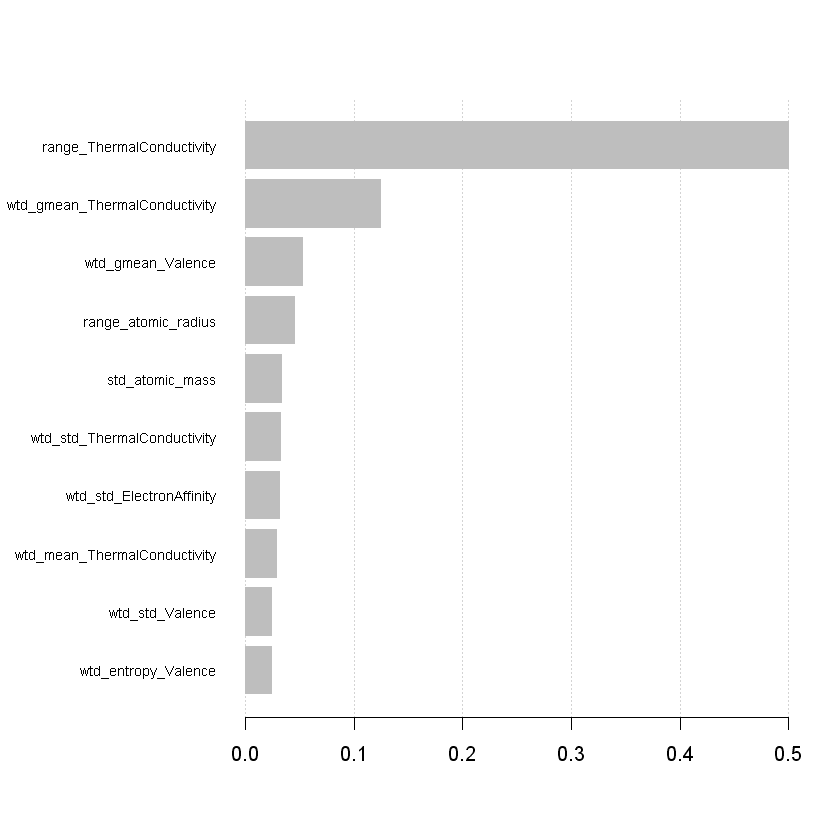

In [82]:
xgb.plot.importance(XGB_importance_matrix, top_n = 10, measure = "Gain")

Predicting on the test data set by converting it into a matrix.

In [83]:
data_test$critical_temp_XGB <- predict(model_XGB, as.matrix(features_test))

In [84]:
print(paste('MSE for XGBoost is : ', mean((data_test$critical_temp - data_test$critical_temp_XGB) ^ 2)))

[1] "MSE for XGBoost is :  94.1147436291053"


In [85]:
print(paste('Accuracy for XGBoost is : ', cor(data_test$critical_temp,data_test$critical_temp_XGB) * 100))

[1] "Accuracy for XGBoost is :  96.0225122528937"


Great stats for our model here! An accuracy of **96.02** is really something. I think we've got ourselves beat here, the next obvious step is to tune the parameters but that takes a lt of computation (~ 6-8 hours) so we'll leave it at that.

# 6. Model Comparison <a class="anchor" id="sec_6"></a>

What's the need to compare models? We need to compare models in order to find the **best solution for our problem**. Based on **MSE and Accuracy**, we can compare the three models which we made.

| Model              | MSE  | Accuracy |
|--------------------|------|----------|
| Linear Regression  | 414.7  | 81      |
| Decision Trees     | 362.6   |  83.62  |
| XGBoost            | 94.11 |  96.02   |

All the models do decently well, but **XGBoost's performance is extraordinary**! It definitely is the shows-topper in our task.

# 7. Conclusion <a class="anchor" id="sec_7"></a>

In Conclusion, we performed extensive EDA on our dataset to get some **actionable insights** which we can incorporate in the model development phase. We identified some important variables through EDA and there were some variables which we identified in the Feature Selection phase! 

In the model development phase, we encountered three models, Linear Regression, Decision Trees and XGBoost. Out of the three, XGBoost finished on top. We compared all the models based on MSE and Accuracy. We, however, didn't try to optimize the model hyperparameters since that was outside the scope of this project.

# 8. References <a class="anchor" id="sec_8"></a>

XGBoost - http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/

Linear Regression - https://www.listendata.com/2015/09/linear-regression-with-r.html

XGBoost Implementation - http://uc-r.github.io/gbm_regression#proscons

Decision Trees - https://en.wikipedia.org/wiki/Decision_tree_learning

Stepwise Regression - https://en.wikipedia.org/wiki/Stepwise_regression